# Imports and custom functions

In [1]:
import pandas as pd
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
plotly.offline.init_notebook_mode(connected=True)
import matplotlib.pyplot as plt

In [2]:
# Global options

sns.set_style("white")
sns.set(font_scale=2, style="ticks")

height=15
aspect=1
x_jitter=0
y_jitter=0

xlim=(0,14)
ylim=(-14, 10)
alpha=1
marker='.'
legend=False

In [3]:
def prepare_df(df_path, df_name):

    """Read in information from dataframe"""

    # read in df1
    df = pd.read_csv(df_path, header=0, sep="\t")
    # Mark significants
    df["Significant"]  = "No"
    df.loc[(df["FDR"] < 0.05) & (df["logCPM"]>2), "Significant"] = "FDR<0.05\nlogCPM>2"
    # set id as index
    df.set_index("id", inplace=True)
    # rename columns
    df.columns = df.columns + "_" + df_name
    # reset index
    df.reset_index(inplace=True)

    return df

In [4]:
def plot_MA(df, df_name):

    """Plot MA"""
    sns_plot = sns.lmplot(x=f"logCPM_{df_name}",
                          y=f"logFC_{df_name}",
                          data=df,
                          fit_reg=False,
                          hue=f"Significant_{df_name}",
                          hue_order=["No", "FDR<0.05\nlogCPM>2"],
                          palette=["black", "blue"],
                          scatter_kws={'alpha':alpha},
                          height=height,
                          aspect=aspect,
                          x_jitter=x_jitter,
                          y_jitter=y_jitter,
                          markers=marker,
                          legend=legend)
    sns_plot = plt.gca()
    sns_plot.set_title(f"MA plot for {df_name}")
    sns_plot.spines['right'].set_visible(True)
    sns_plot.spines['top'].set_visible(True)
    sns_plot.set(xlim=xlim, ylim=ylim)


In [5]:
def merge_df(df_1, df_2):
    
    """Merge dataframes"""
    
    df = pd.merge(df_1, df_2, on="id", how="right")
    df["Significant"] = "No"
    return df

In [6]:
def plot_FC_correlation(df, FC_1_name, FC_2_name, hue, hue_order):

    """Plot correlation between FCs"""

    sns_plot = sns.lmplot(f"logFC_{FC_1_name}",
                          y=f"logFC_{FC_2_name}",
                          data=df,
                          fit_reg=False,
                          hue=hue,
                          hue_order=hue_order,
                          palette=["black", "blue", "red", "green"],
                          scatter_kws={'alpha':alpha},
                          height=height,
                          aspect=aspect,
                          x_jitter=x_jitter,
                          y_jitter=y_jitter,
                          markers=marker,
                          legend=legend)
    sns_plot = plt.gca()
    sns_plot.set_title(f"FCs between {FC_1_name} and {FC_2_name}")
    sns_plot.spines['right'].set_visible(True)
    sns_plot.spines['top'].set_visible(True)
    sns_plot.set(xlim=xlim, ylim=ylim)


In [7]:
def compare(df_1_path, df_2_path, df_1_name, df_2_name):
    
    "Combine multiple functions"
    
    df_1 = prepare_df(df_1_path, df_1_name)
    plot_MA(df_1, df_1_name)
    df_2 = prepare_df(df_2_path, df_2_name)
    plot_MA(df_2, df_2_name)
    
    df_merged = merge_df(df_1, df_2)
    
#     plot_FC_correlation(df_merged, df_1_name, df_2_name, hue="Significant")
#     plot_FC_correlation(df_merged, df_1_name, df_2_name, hue="Significant_" + df_1_name)
#     plot_FC_correlation(df_merged, df_1_name, df_2_name, hue="Significant_" + df_2_name)
    
    return df_merged

# Input files

In [8]:
ip_path = "../WAGO_3_IP/results/DE__N2_Input_Rpph__N2_xf119_Rpph/plot_small_RNAs/22G.tsv"
ip_name = "WAGO-3"

ip_wago_9_path = "../WAGO_9_IP/results/DE__wago-9_input__wago-9_IP/plot_small_RNAs/22G.tsv"
ip_wago_9_name = "WAGO-9"

ip_csr_1_path = "../csr_1_IP/results/DE__csr-1_input__csr-1_IP/plot_small_RNAs/22G.tsv"
ip_csr_1_name = "csr-1"

Dpf_3_null_path = "../small_RNA_seq_15_C/results/DE__WT__Dpf_3_null/plot_small_RNAs/22G.tsv"
Dpf_3_null_name = "Dpf_3_null"

Dpf_3_S784A_path = "../small_RNA_seq_15_C/results/DE__WT__Dpf_3_S784A//plot_small_RNAs/22G.tsv"
Dpf_3_S784A_name = "Dpf_3_S784A"

mut_2_path = "../small_RNA_seq_15_C/results/DE__WT__mut_2/plot_small_RNAs/22G.tsv"
mut_2_name = "mut_2"

mut_7_path = "../small_RNA_seq_15_C/results/DE__WT__mut_7/plot_small_RNAs/22G.tsv"
mut_7_name = "mut_7"

## 1. IP WAGO-3 vs Dpf_3_null

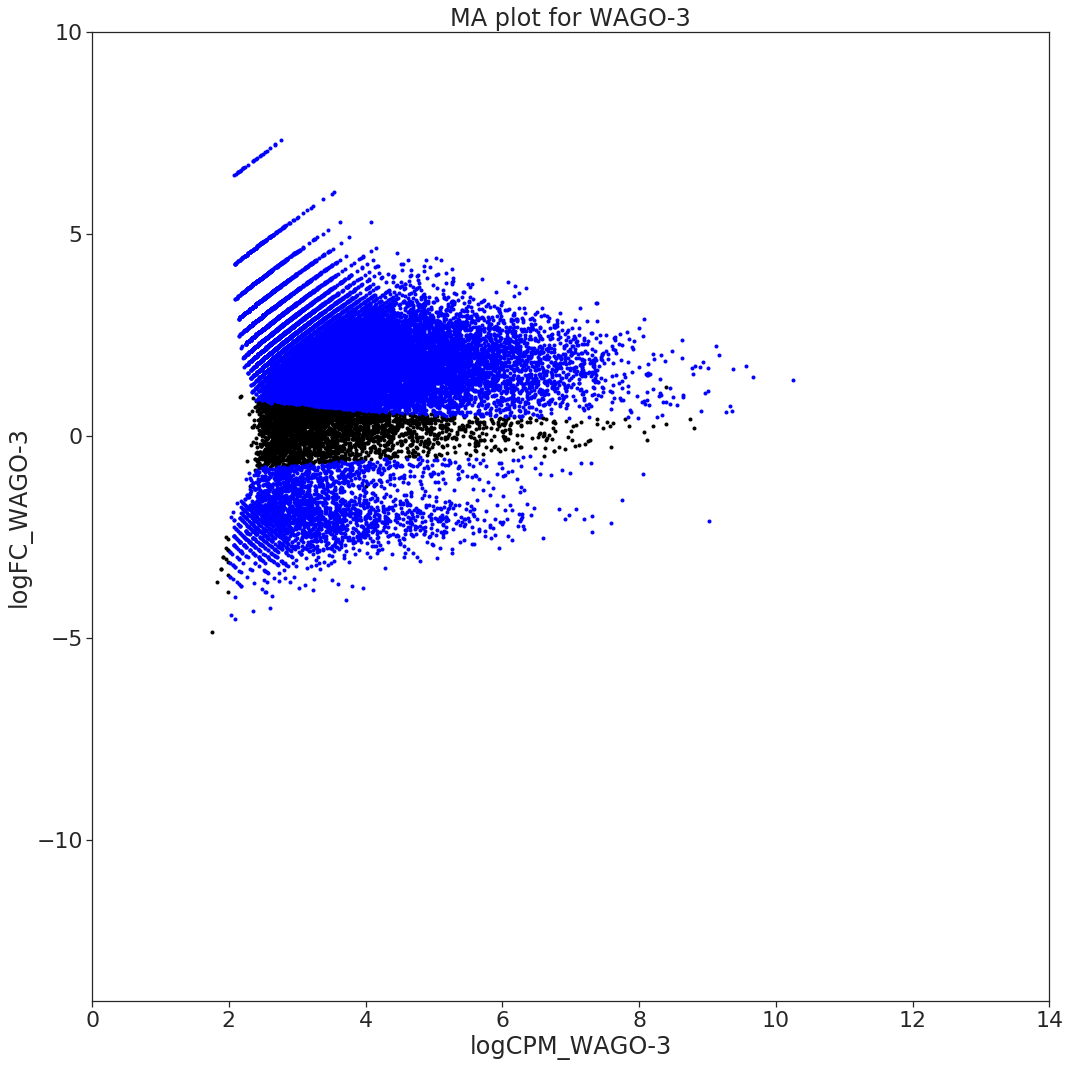

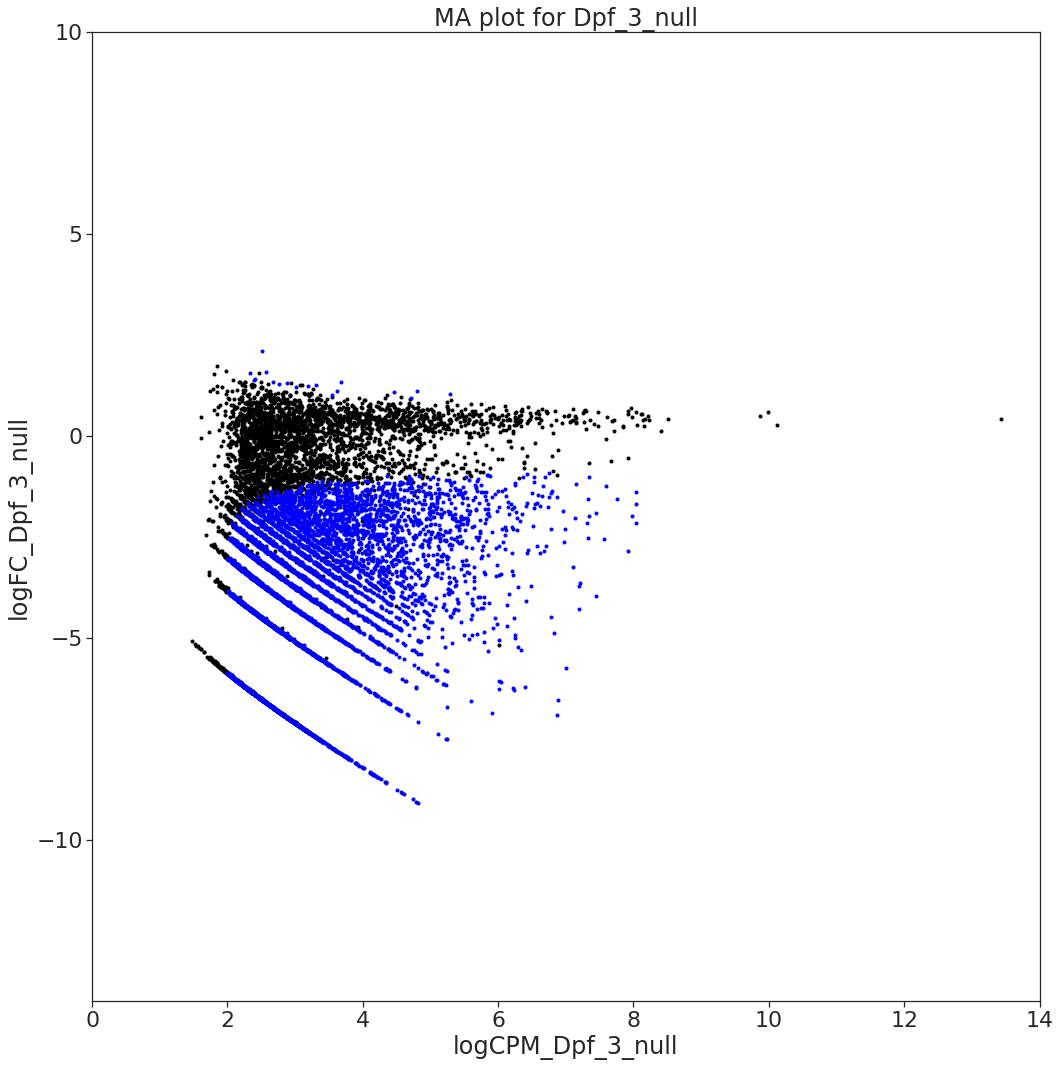

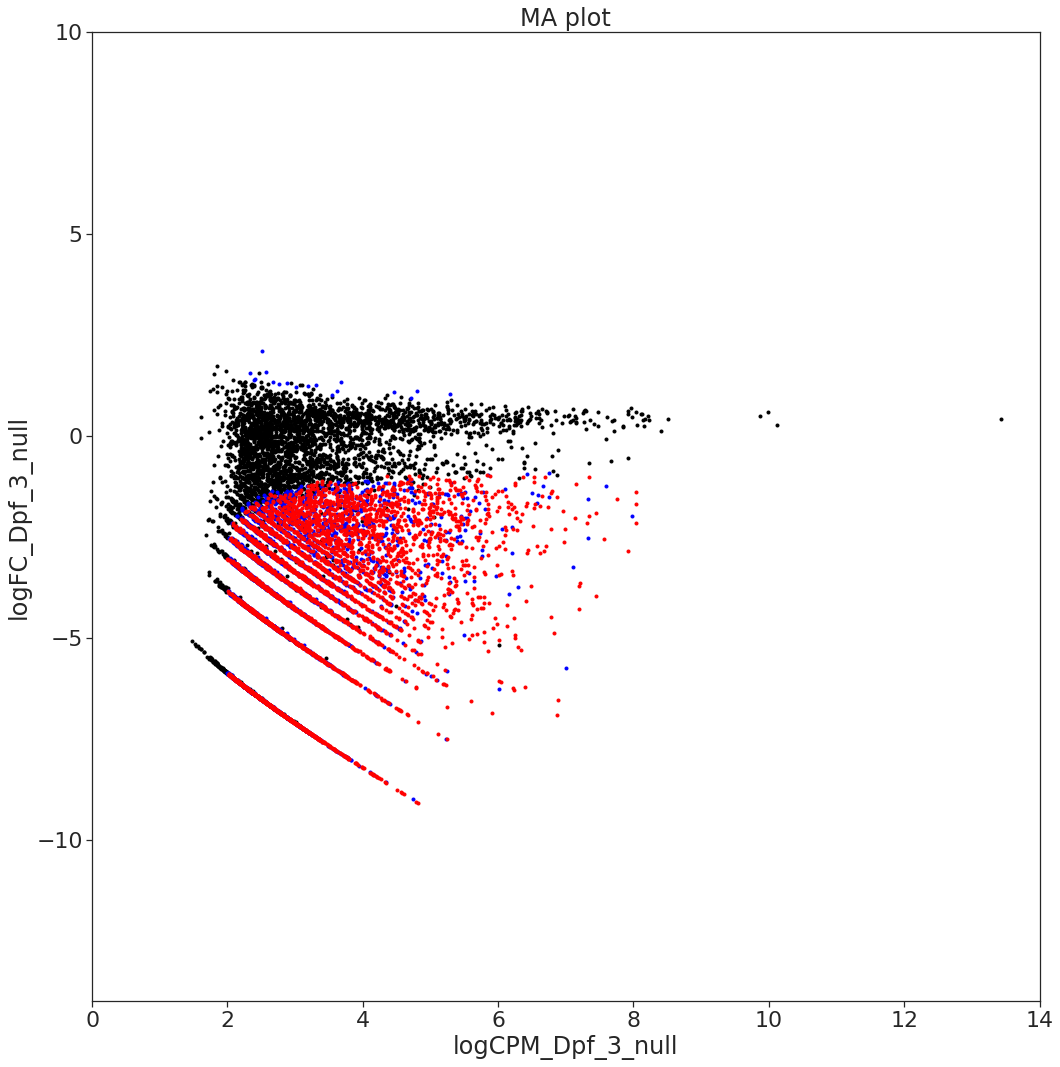

Significant
FDR_Dpf_3_null<0.05\nlogCPM_Dpf_3_null>2\nFDR_W...         4402
No                                                         3489
FDR_Dpf_3_null<0.05\nlogCPM_Dpf_3_null>2                   3297

In [9]:
df_1_path = ip_path
df_2_path = Dpf_3_null_path
df_1_name = ip_name
df_2_name = Dpf_3_null_name

df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logCPM_{df_2_name}"]>2),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logCPM_{df_2_name}"]>2) &
           (df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]>0) &
           (df_all[f"logCPM_{df_1_name}"]>2),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogCPM_{df_1_name}>2"


sns_plot = sns.lmplot(x=f"logCPM_{df_2_name}",
                      y=f"logFC_{df_2_name}",
                      data=df_all,
                      fit_reg=False,
                      hue=f"Significant",
                      hue_order=["No", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogCPM_{df_1_name}>2"],
                      palette=["black", "blue", "red"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend)

sns_plot = plt.gca()
sns_plot.set_title(f"MA plot")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)
sns_plot.set(xlim=xlim, ylim=ylim)

plt.savefig(f"plots/MA_{df_2_name}_mark_{df_1_name}.pdf")
plt.show()

pd.DataFrame(df_all["Significant"].value_counts())

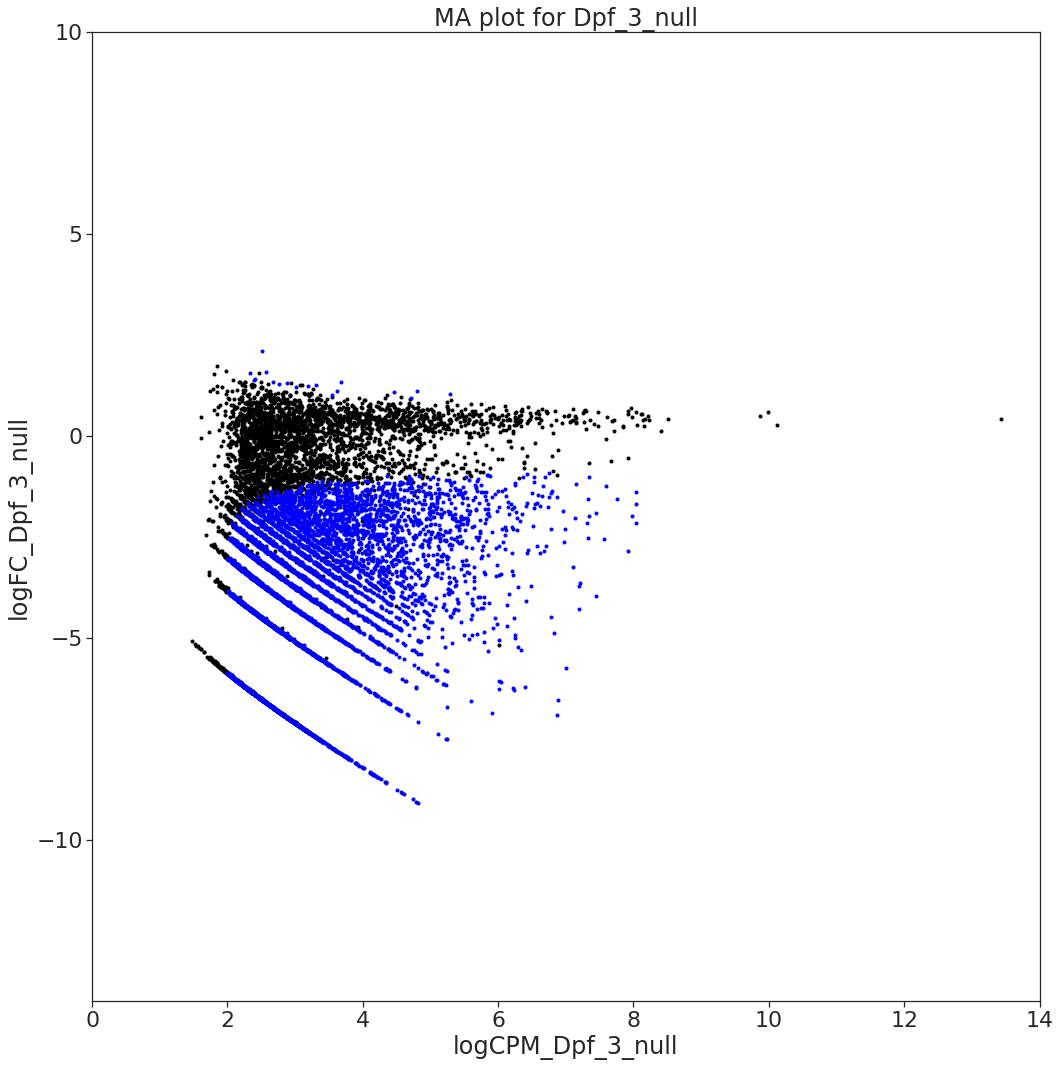

In [10]:
df = prepare_df(df_2_path, df_2_name)
df_name = df_2_name

sns_plot = sns.lmplot(x=f"logCPM_{df_name}",
                      y=f"logFC_{df_name}",
                      data=df,
                      fit_reg=False,
                      hue=f"Significant_{df_name}",
                      hue_order=["No", "FDR<0.05\nlogCPM>2"],
                      palette=["black", "blue"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend)

sns_plot = plt.gca()
sns_plot.set_title(f"MA plot for {df_name}")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)
sns_plot.set(xlim=xlim, ylim=ylim)

plt.savefig(f"plots/MA_{df_name}.pdf")
plt.show()

## 2. IP WAGO-3 vs Dpf_3_S784A

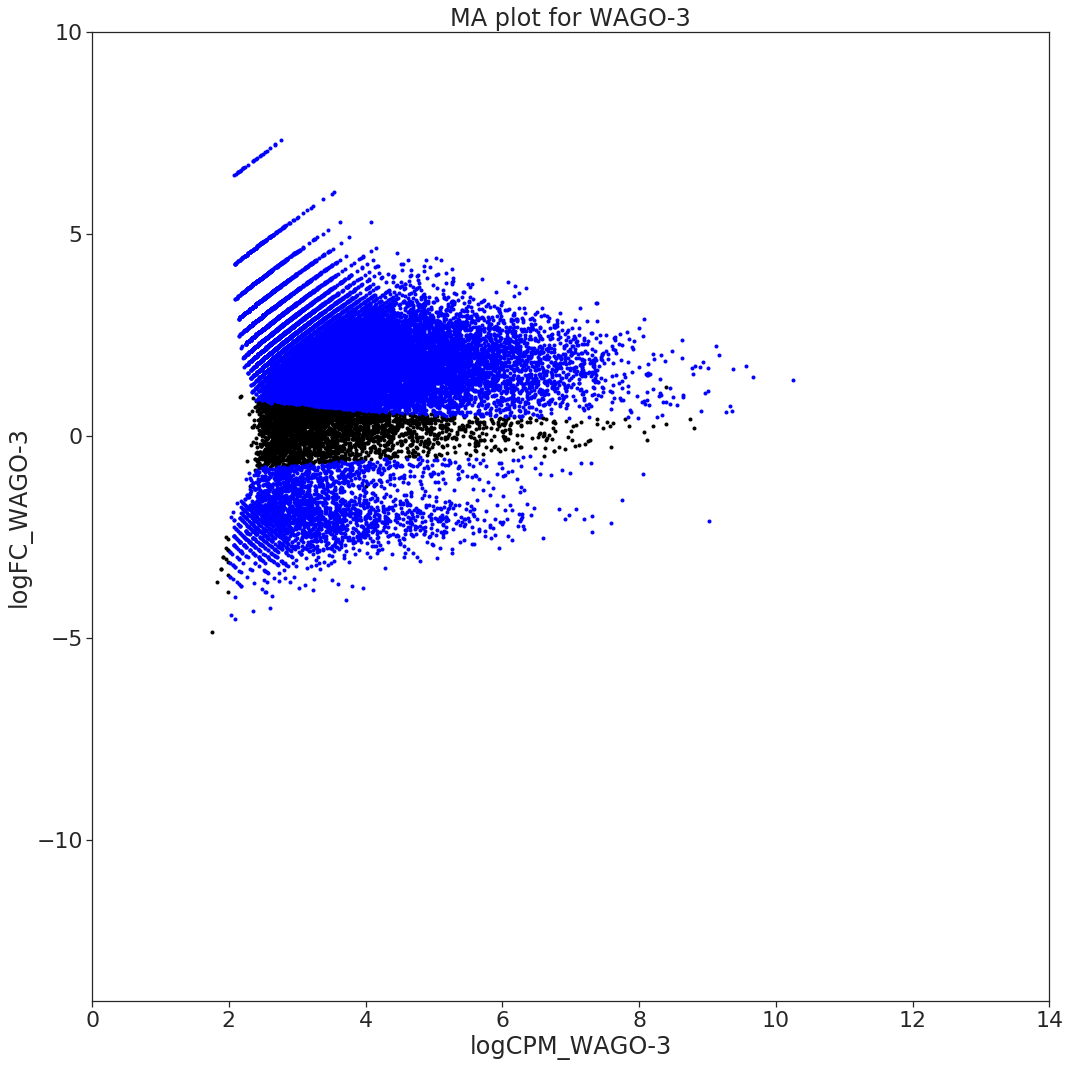

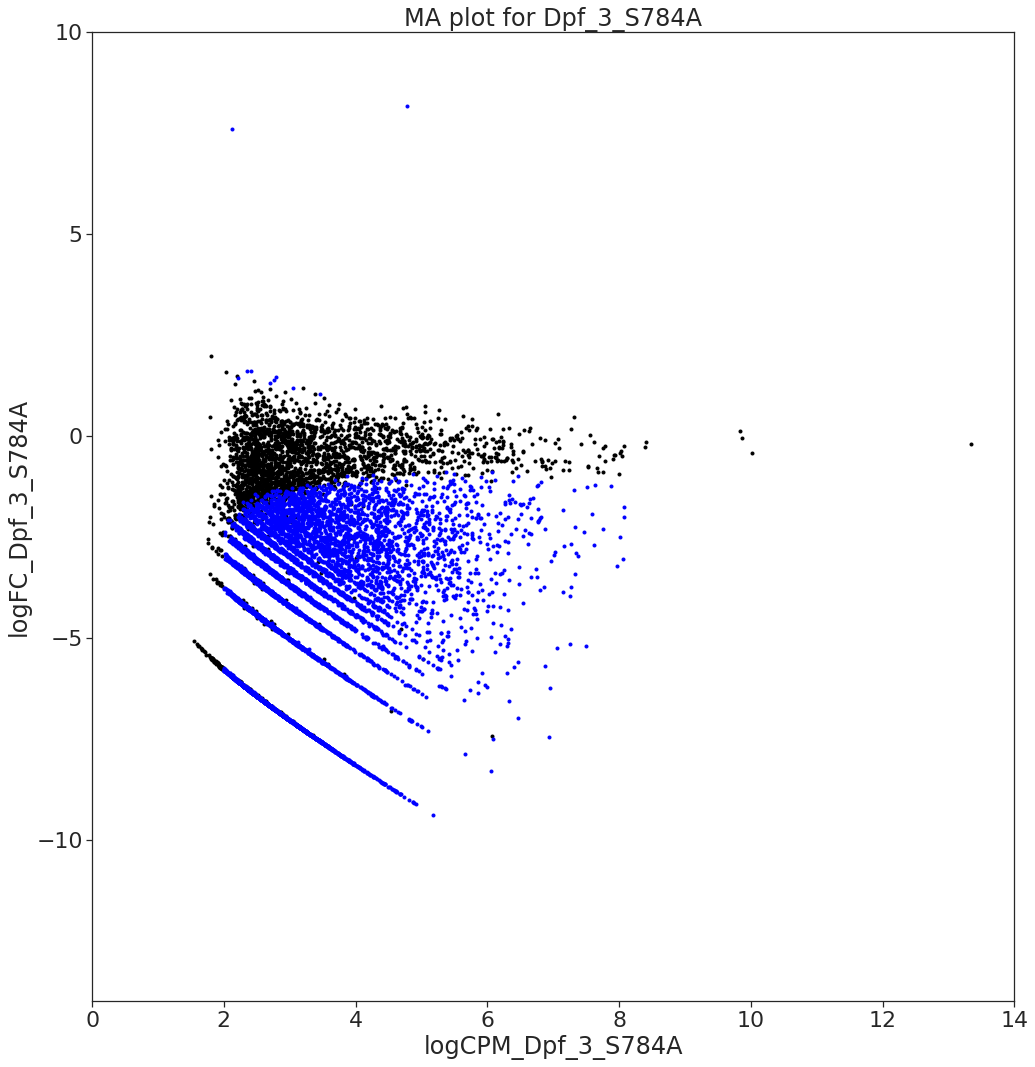

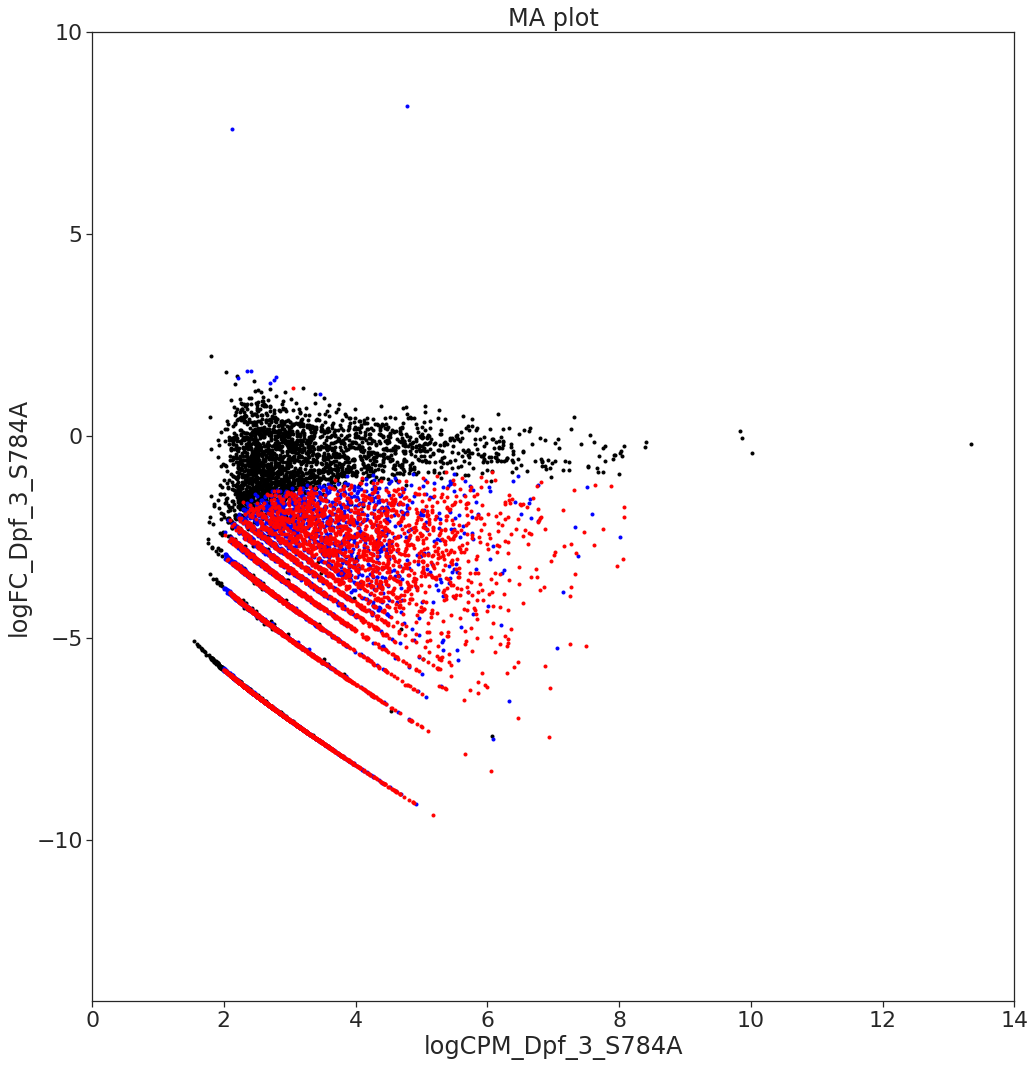

Significant
FDR_Dpf_3_S784A<0.05\nlogCPM_Dpf_3_S784A>2\nFDR...         4688
FDR_Dpf_3_S784A<0.05\nlogCPM_Dpf_3_S784A>2                 3835
No                                                         2498

In [11]:
df_1_path = ip_path
df_2_path = Dpf_3_S784A_path
df_1_name = ip_name
df_2_name = Dpf_3_S784A_name

df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logCPM_{df_2_name}"]>2),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logCPM_{df_2_name}"]>2) &
           (df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]>0) &
           (df_all[f"logCPM_{df_1_name}"]>2),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogCPM_{df_1_name}>2"

sns_plot = sns.lmplot(x=f"logCPM_{df_2_name}",
                      y=f"logFC_{df_2_name}",
                      data=df_all,
                      fit_reg=False,
                      hue=f"Significant",
                      hue_order=["No", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogCPM_{df_1_name}>2"],
                      palette=["black", "blue", "red"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend)

sns_plot = plt.gca()
sns_plot.set_title(f"MA plot")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)
sns_plot.set(xlim=xlim, ylim=ylim)


plt.savefig(f"plots/MA_{df_2_name}_mark_{df_1_name}.pdf")
plt.show()

pd.DataFrame(df_all["Significant"].value_counts())

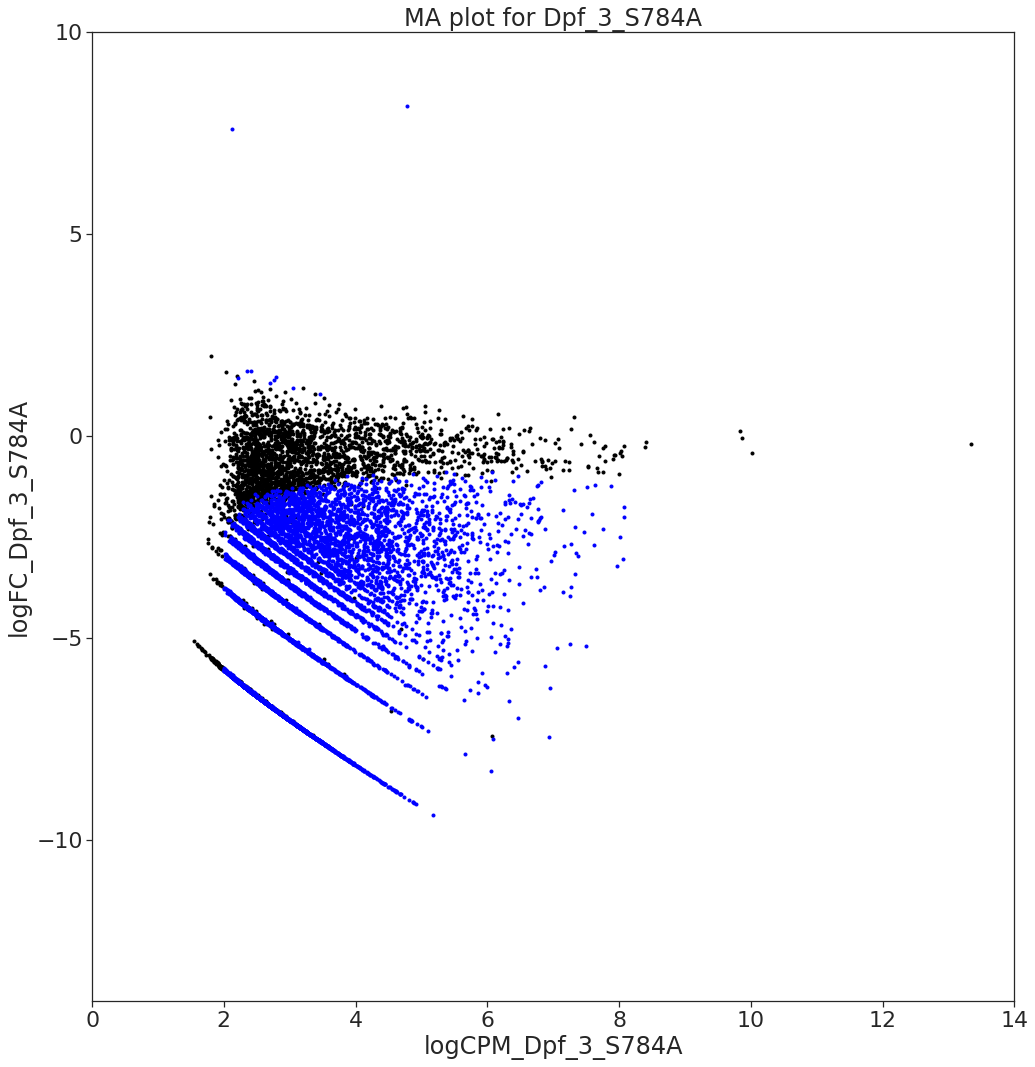

In [12]:
df = prepare_df(df_2_path, df_2_name)
df_name = df_2_name

sns_plot = sns.lmplot(x=f"logCPM_{df_name}",
                      y=f"logFC_{df_name}",
                      data=df,
                      fit_reg=False,
                      hue=f"Significant_{df_name}",
                      hue_order=["No", "FDR<0.05\nlogCPM>2"],
                      palette=["black", "blue"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend)

sns_plot = plt.gca()
sns_plot.set_title(f"MA plot for {df_name}")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)
sns_plot.set(xlim=xlim, ylim=ylim)

plt.savefig(f"plots/MA_{df_name}.pdf")
plt.show()

## 3. IP WAGO-3 vs mut_2

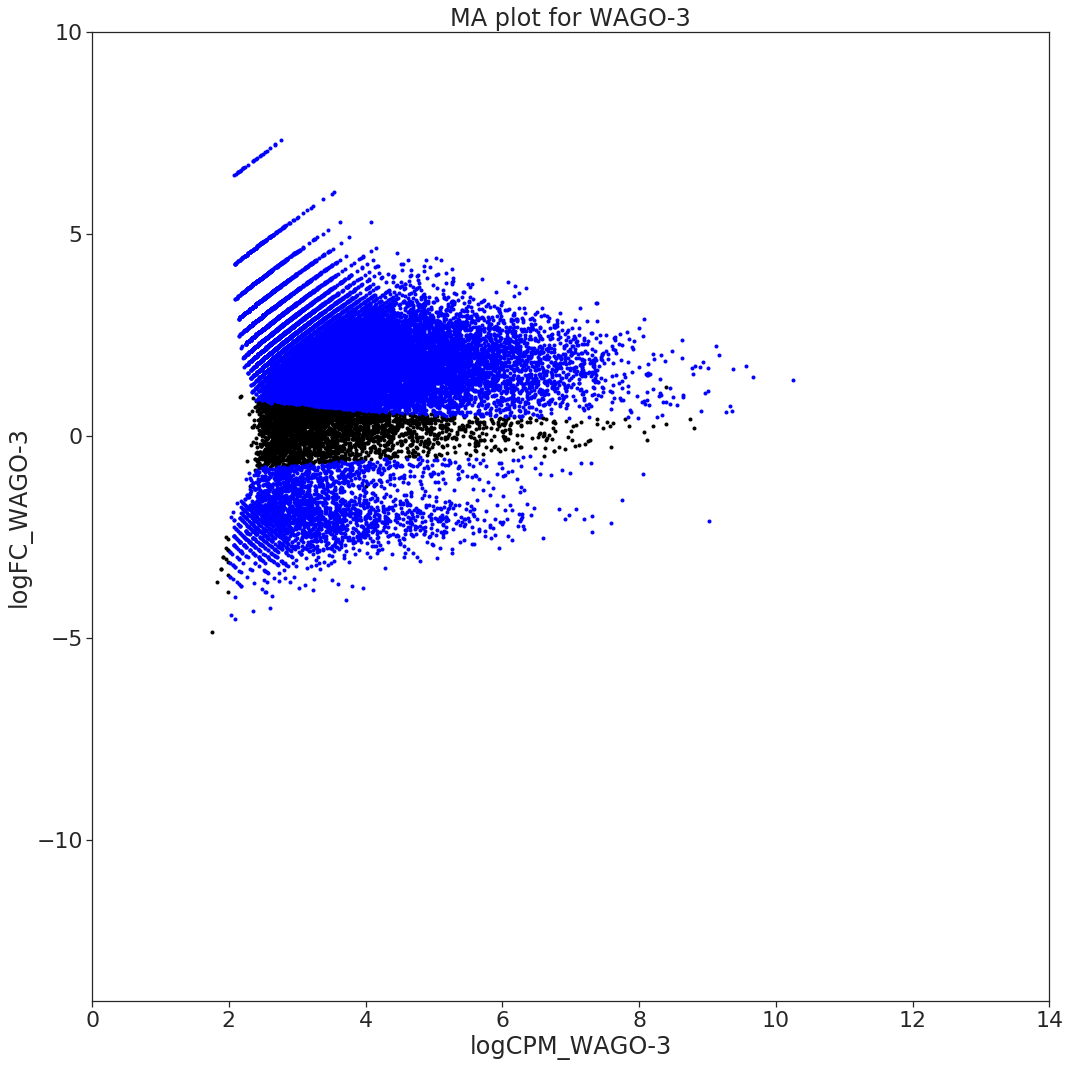

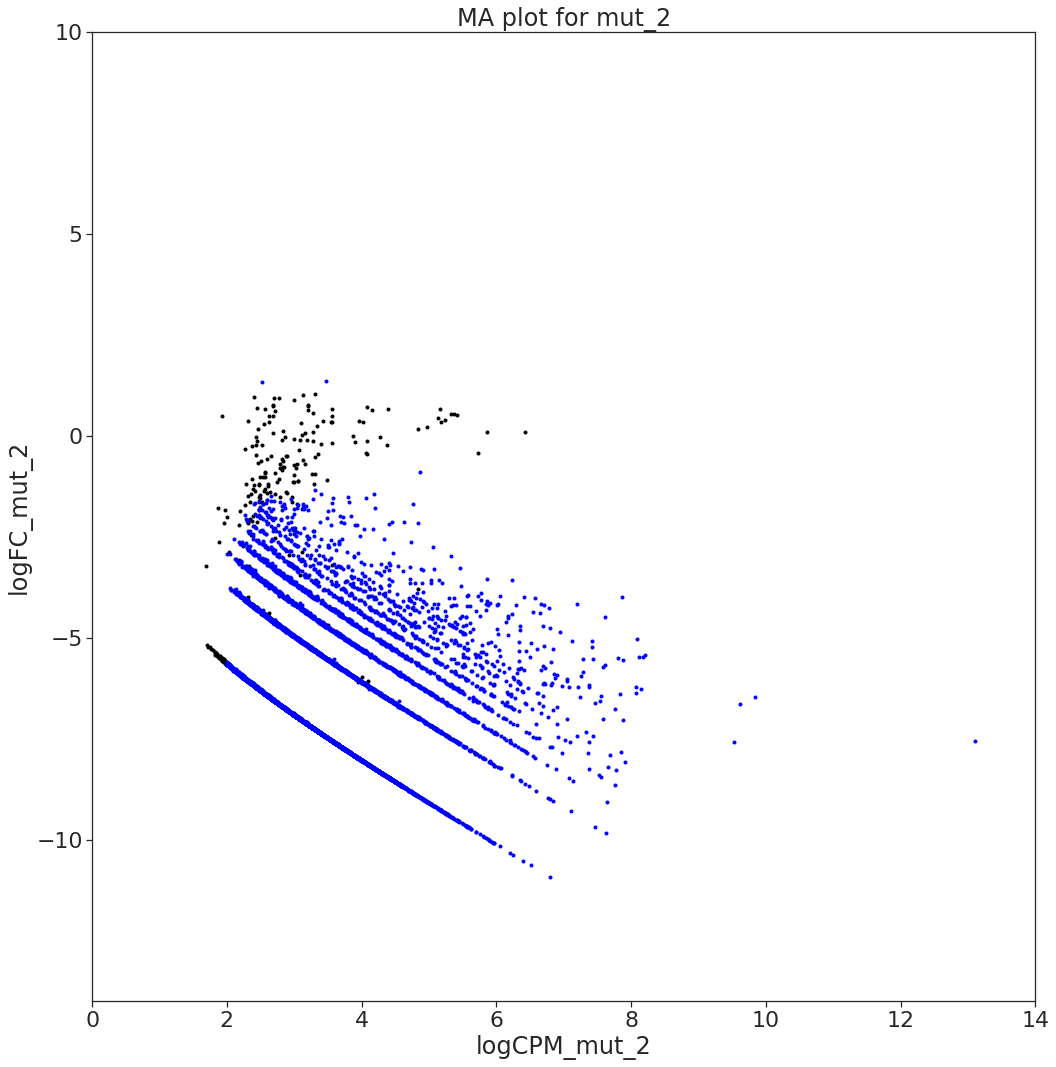

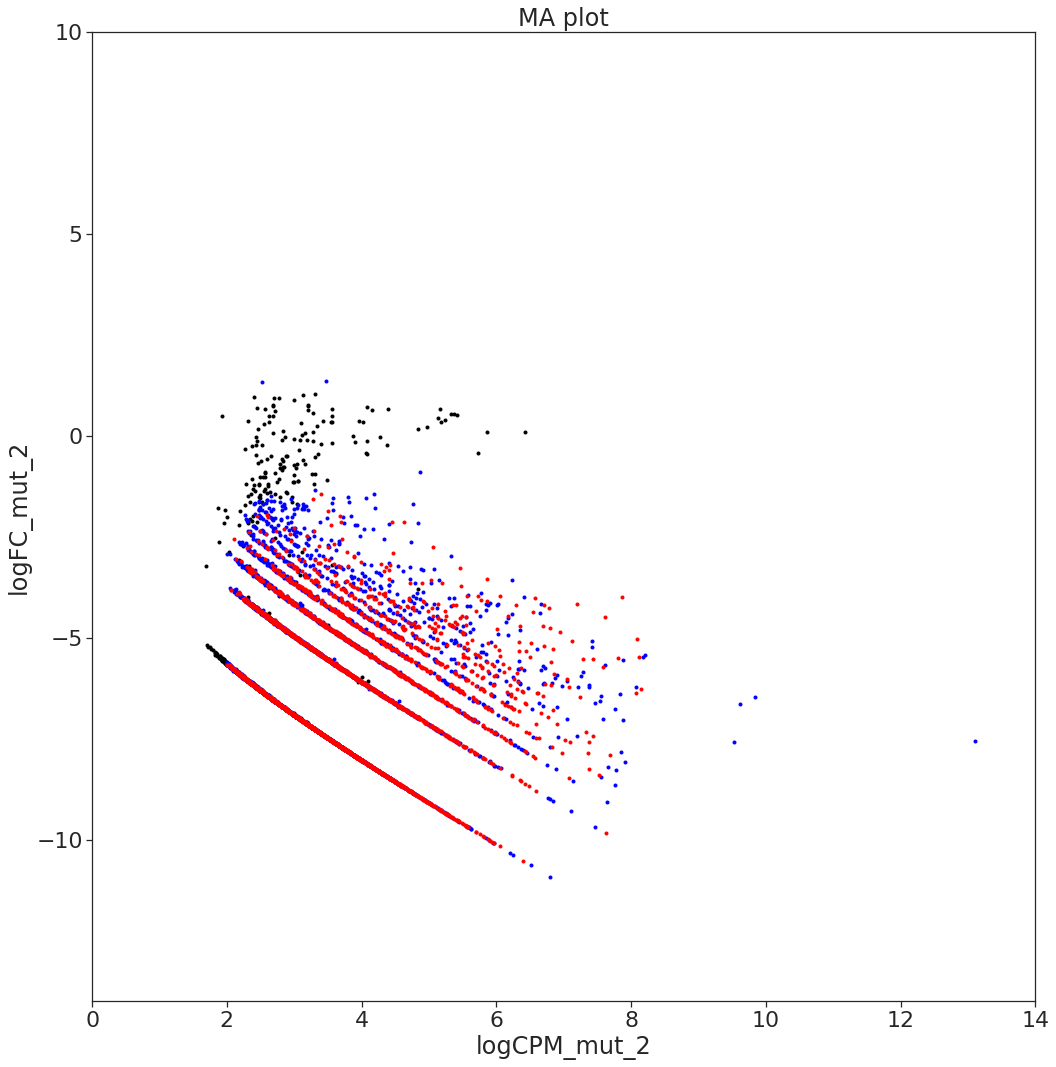

Significant
FDR_mut_2<0.05\nlogCPM_mut_2>2                             5589
FDR_mut_2<0.05\nlogCPM_mut_2>2\nFDR_WAGO-3<0.05...         4992
No                                                          272

In [13]:
df_1_path = ip_path
df_2_path = mut_2_path
df_1_name = ip_name
df_2_name = mut_2_name

df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logCPM_{df_2_name}"]>2),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logCPM_{df_2_name}"]>2) &
           (df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]>0) &
           (df_all[f"logCPM_{df_1_name}"]>2),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogCPM_{df_1_name}>2"

sns_plot = sns.lmplot(x=f"logCPM_{df_2_name}",
                      y=f"logFC_{df_2_name}",
                      data=df_all,
                      fit_reg=False,
                      hue=f"Significant",
                      hue_order=["No", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogCPM_{df_1_name}>2"],
                      palette=["black", "blue", "red"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend)

sns_plot = plt.gca()
sns_plot.set_title(f"MA plot")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)
sns_plot.set(xlim=xlim, ylim=ylim)


plt.savefig(f"plots/MA_{df_2_name}_mark_{df_1_name}.pdf")
plt.show()

pd.DataFrame(df_all["Significant"].value_counts())

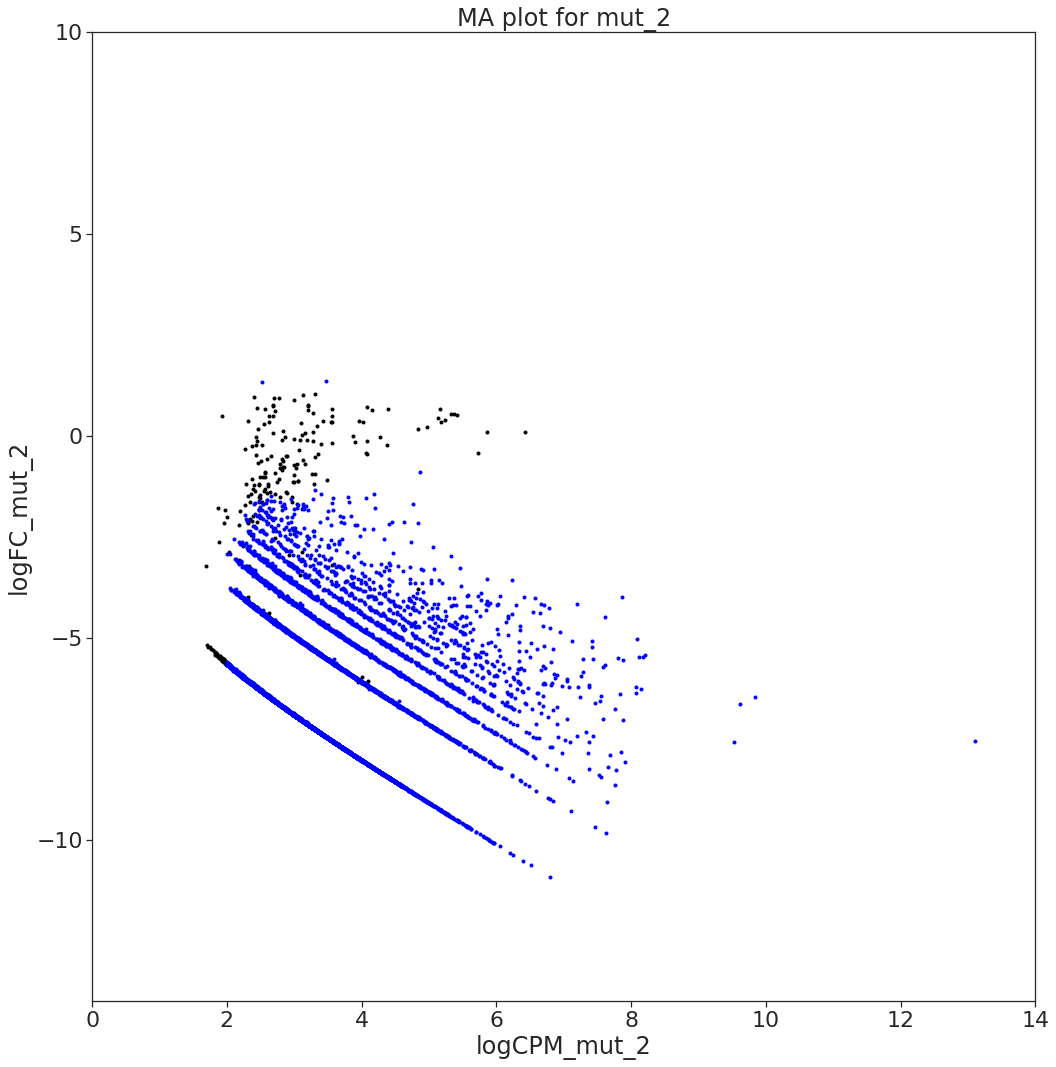

In [14]:
df = prepare_df(df_2_path, df_2_name)
df_name = df_2_name

sns_plot = sns.lmplot(x=f"logCPM_{df_name}",
                      y=f"logFC_{df_name}",
                      data=df,
                      fit_reg=False,
                      hue=f"Significant_{df_name}",
                      hue_order=["No", "FDR<0.05\nlogCPM>2"],
                      palette=["black", "blue"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend)

sns_plot = plt.gca()
sns_plot.set_title(f"MA plot for {df_name}")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)
sns_plot.set(xlim=xlim, ylim=ylim)

plt.savefig(f"plots/MA_{df_name}.pdf")
plt.show()

## 4. IP WAGO-3 vs mut_7

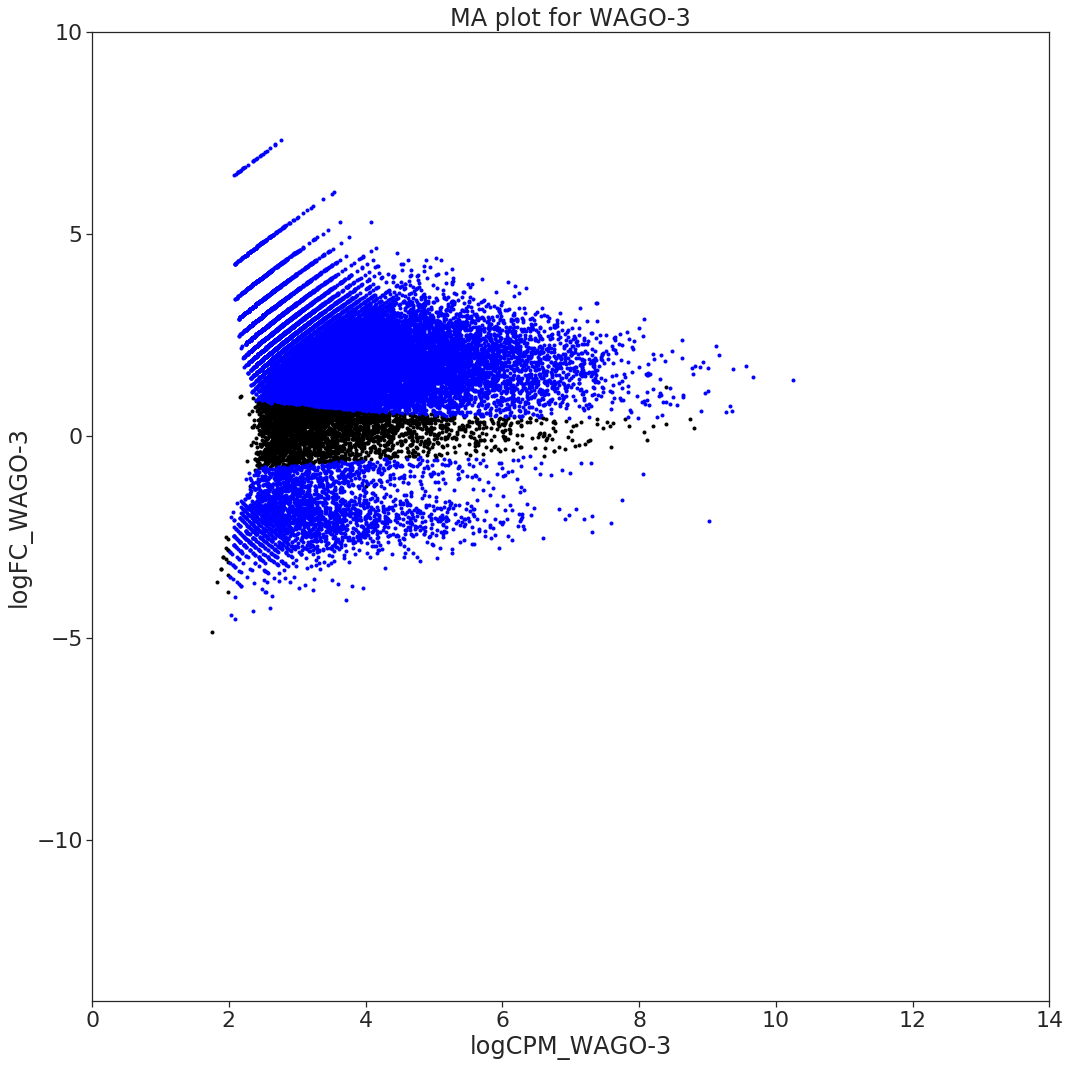

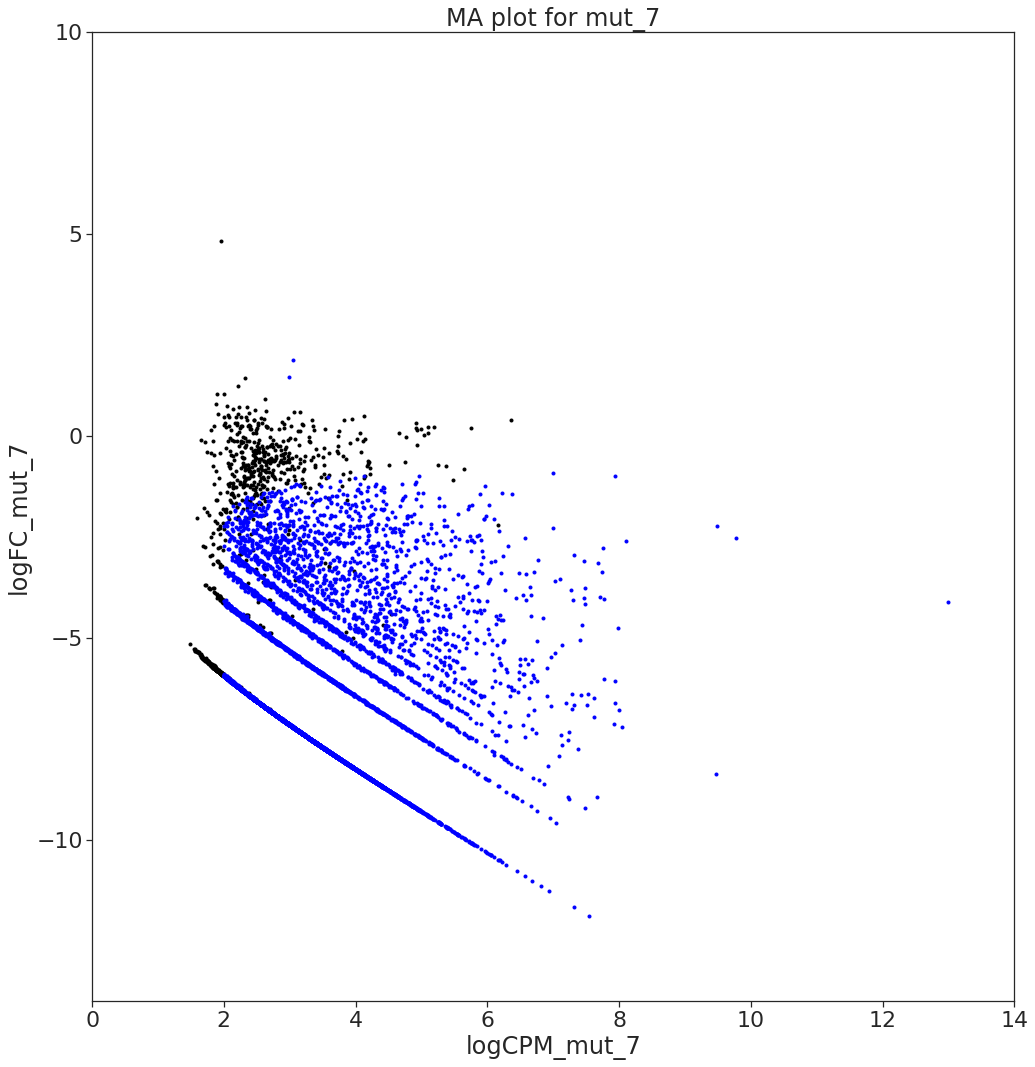

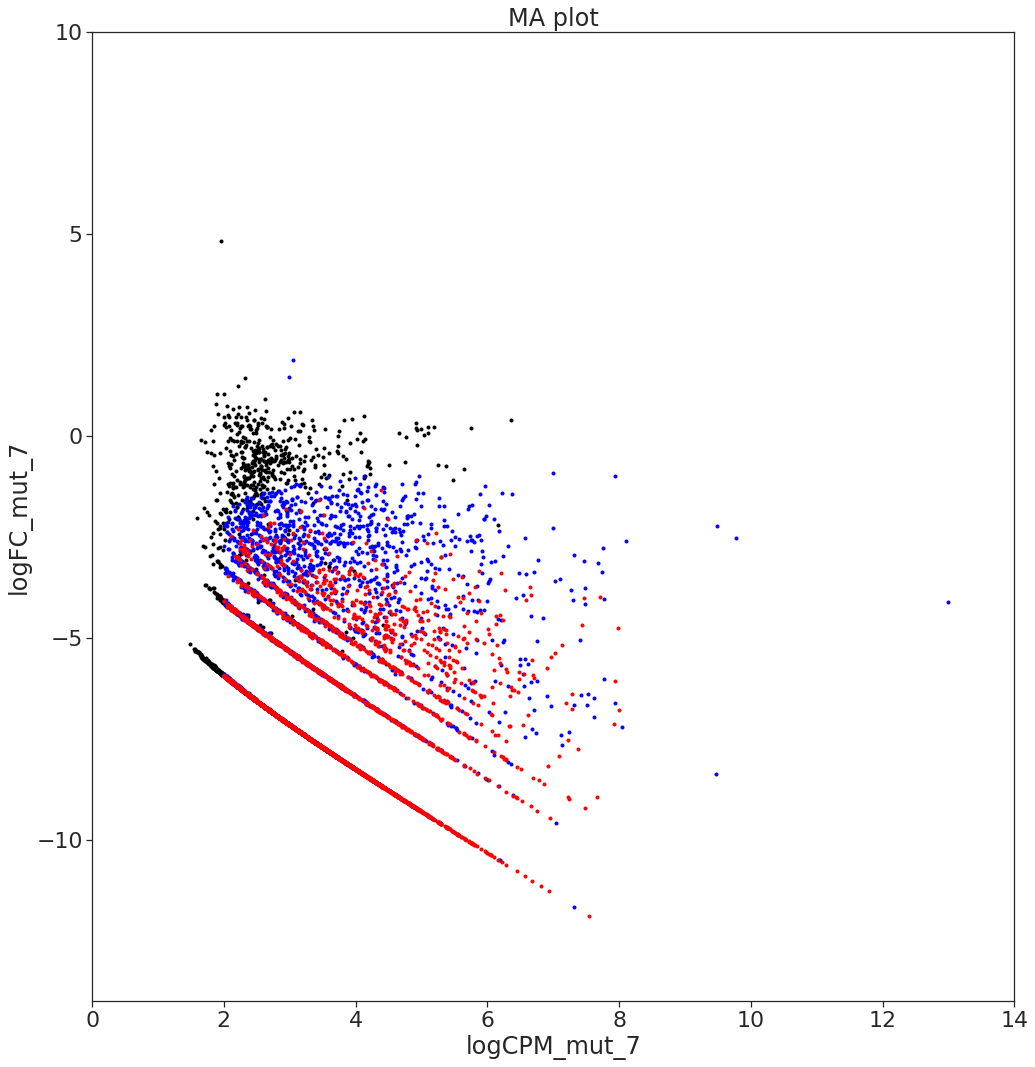

Significant
FDR_mut_7<0.05\nlogCPM_mut_7>2                             5498
FDR_mut_7<0.05\nlogCPM_mut_7>2\nFDR_WAGO-3<0.05...         5082
No                                                          922

In [15]:
df_1_path = ip_path
df_2_path = mut_7_path
df_1_name = ip_name
df_2_name = mut_7_name

df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logCPM_{df_2_name}"]>2),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logCPM_{df_2_name}"]>2) &
           (df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]>0) &
           (df_all[f"logCPM_{df_1_name}"]>2),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogCPM_{df_1_name}>2"

sns_plot = sns.lmplot(x=f"logCPM_{df_2_name}",
                      y=f"logFC_{df_2_name}",
                      data=df_all,
                      fit_reg=False,
                      hue=f"Significant",
                      hue_order=["No", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogCPM_{df_1_name}>2"],
                      palette=["black", "blue", "red"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend)

sns_plot = plt.gca()
sns_plot.set_title(f"MA plot")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)
sns_plot.set(xlim=xlim, ylim=ylim)


plt.savefig(f"plots/MA_{df_2_name}_mark_{df_1_name}.pdf")
plt.show()


pd.DataFrame(df_all["Significant"].value_counts())

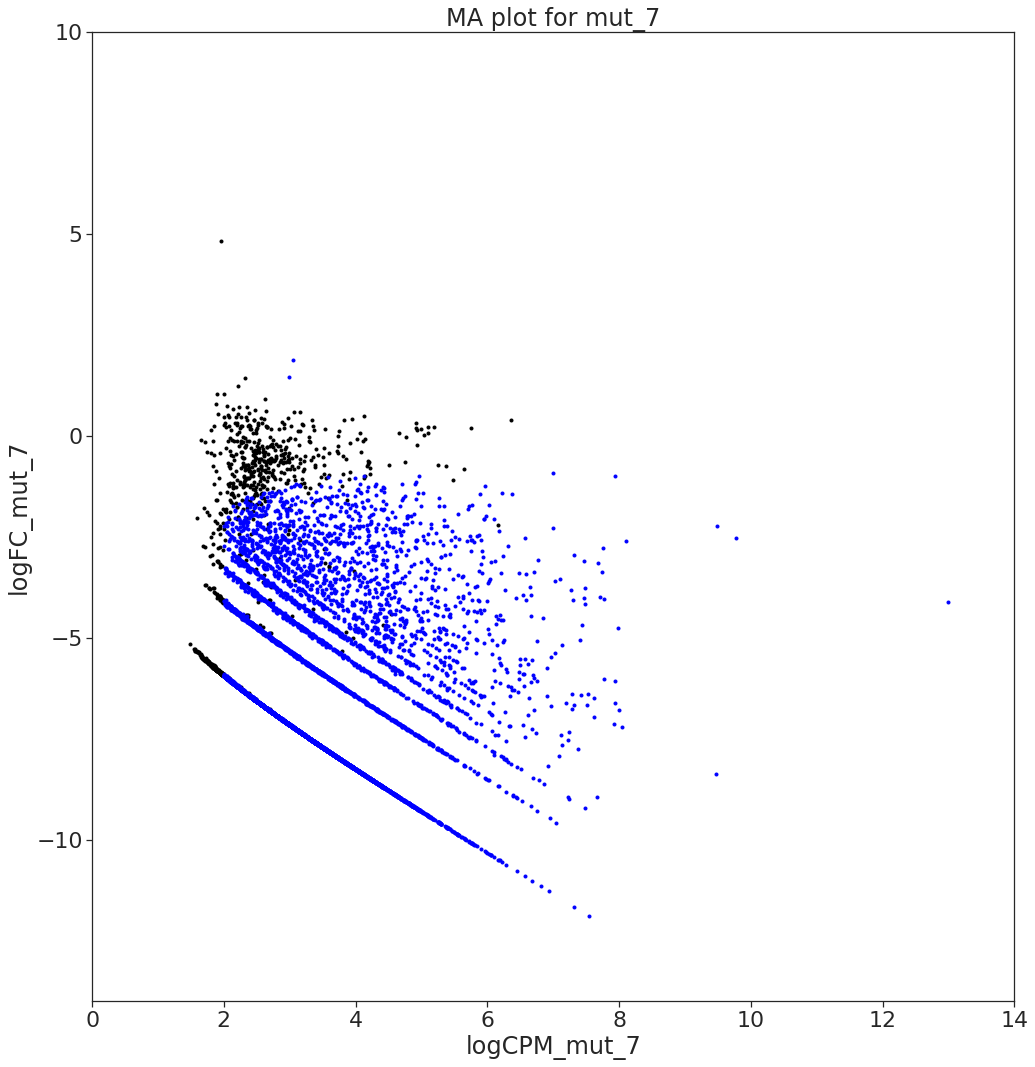

In [16]:
df = prepare_df(df_2_path, df_2_name)
df_name = df_2_name

sns_plot = sns.lmplot(x=f"logCPM_{df_name}",
                      y=f"logFC_{df_name}",
                      data=df,
                      fit_reg=False,
                      hue=f"Significant_{df_name}",
                      hue_order=["No", "FDR<0.05\nlogCPM>2"],
                      palette=["black", "blue"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend)

sns_plot = plt.gca()
sns_plot.set_title(f"MA plot for {df_name}")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)
sns_plot.set(xlim=xlim, ylim=ylim)

plt.savefig(f"plots/MA_{df_name}.pdf")
plt.show()

## 12. IP WAGO-9 vs Dpf_3_null

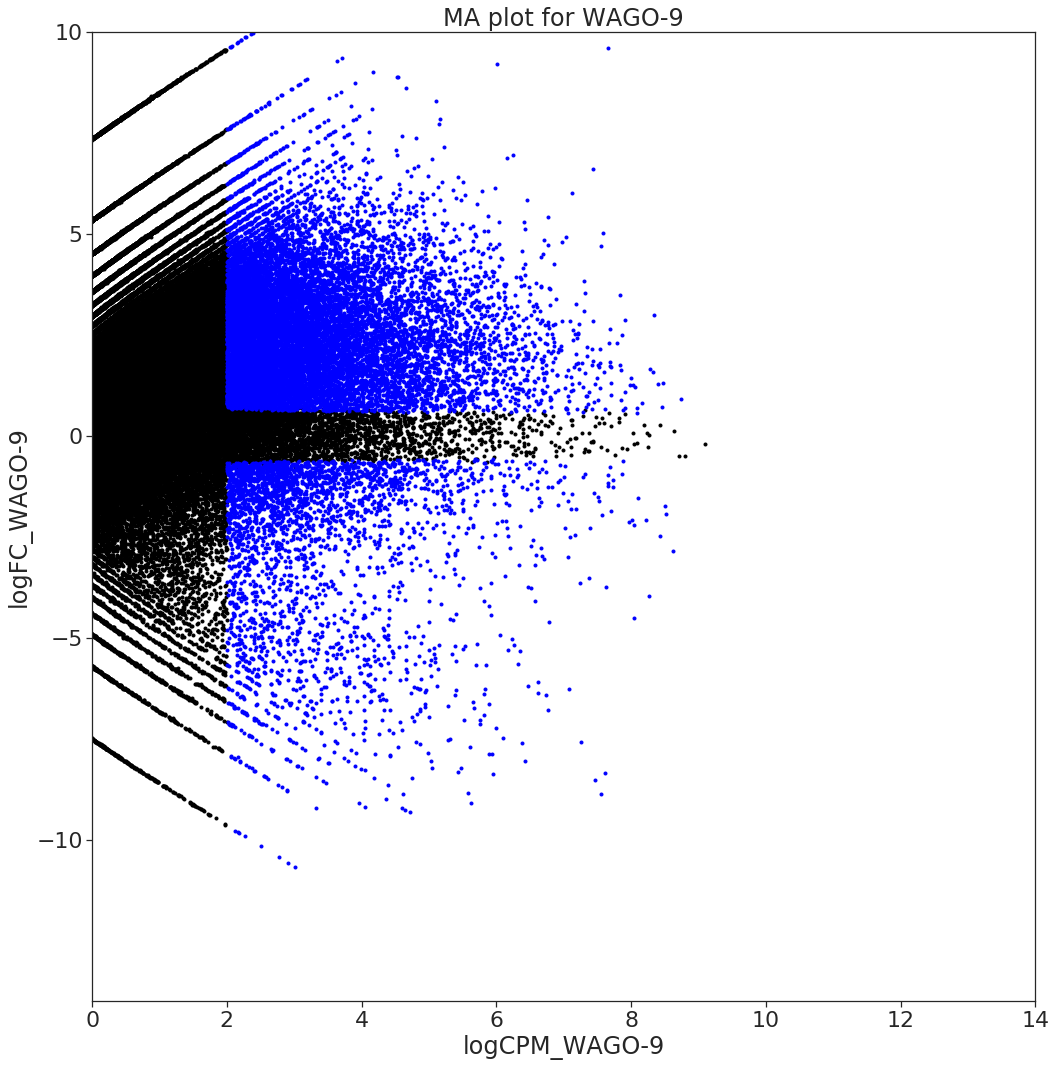

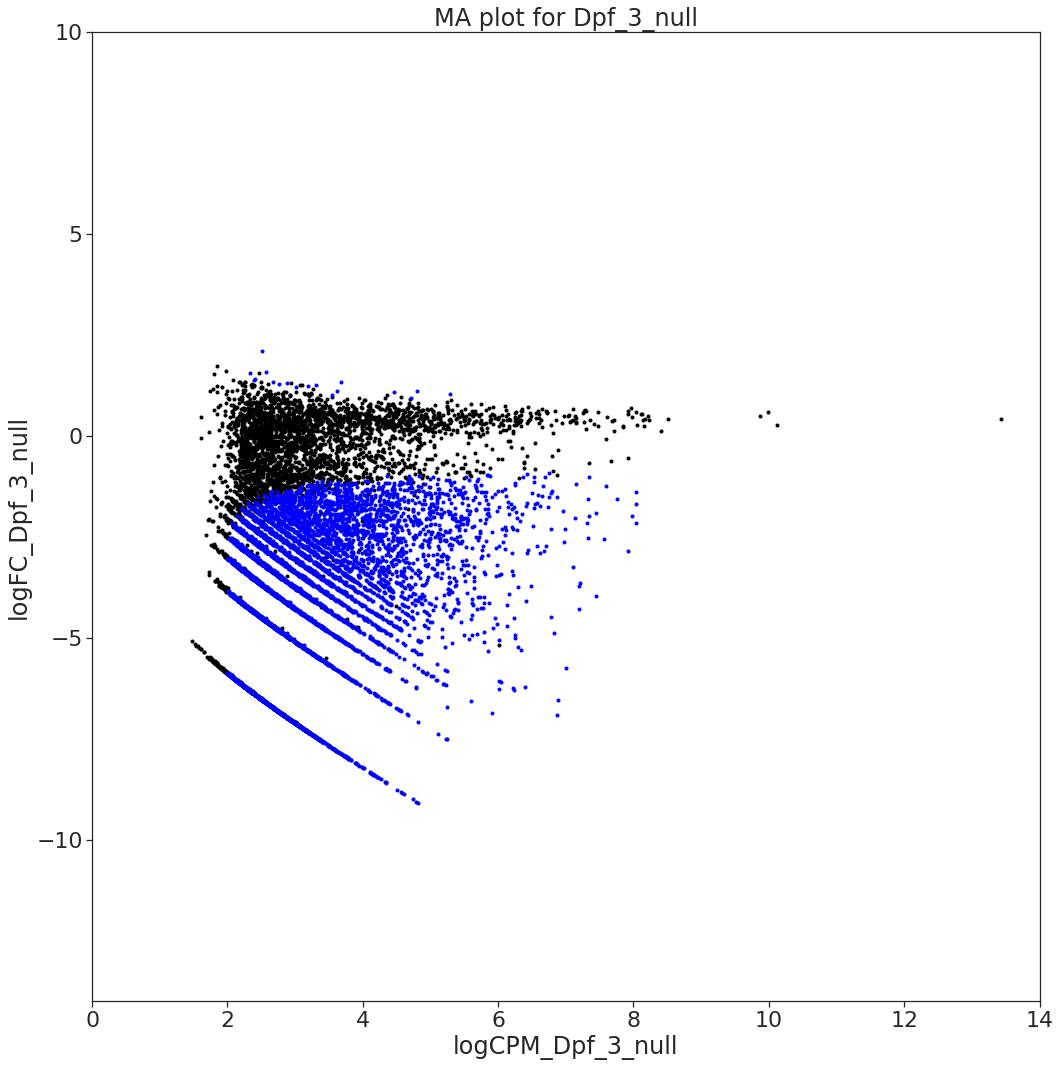

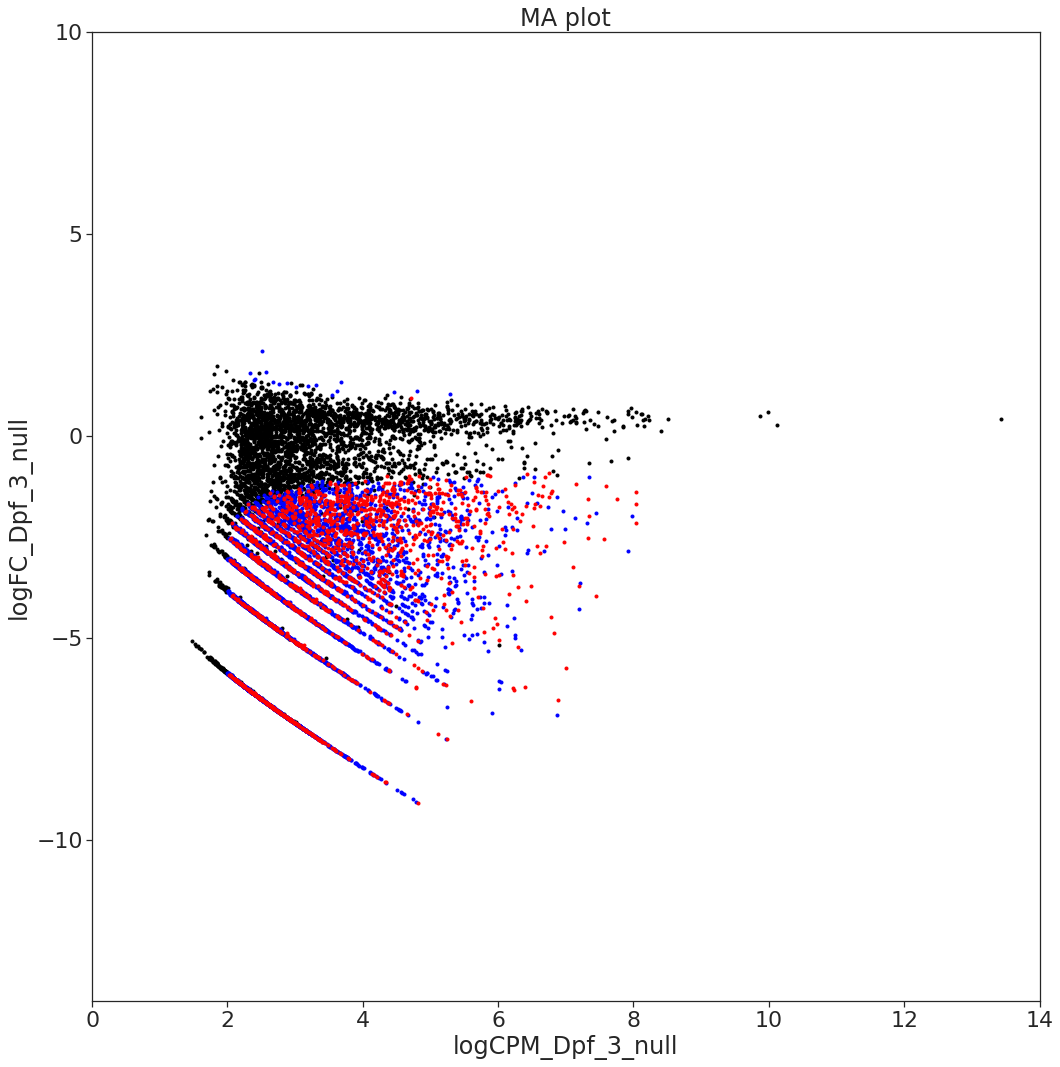

Significant
FDR_Dpf_3_null<0.05\nlogCPM_Dpf_3_null>2                   5979
No                                                         3489
FDR_Dpf_3_null<0.05\nlogCPM_Dpf_3_null>2\nFDR_W...         1720

In [17]:
df_1_path = ip_wago_9_path
df_2_path = Dpf_3_null_path
df_1_name = ip_wago_9_name
df_2_name = Dpf_3_null_name

df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logCPM_{df_2_name}"]>2),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logCPM_{df_2_name}"]>2) &
           (df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]>0) &
           (df_all[f"logCPM_{df_1_name}"]>2),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogCPM_{df_1_name}>2"

sns_plot = sns.lmplot(x=f"logCPM_{df_2_name}",
                      y=f"logFC_{df_2_name}",
                      data=df_all,
                      fit_reg=False,
                      hue=f"Significant",
                      hue_order=["No", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogCPM_{df_1_name}>2"],
                      palette=["black", "blue", "red"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend)

sns_plot = plt.gca()
sns_plot.set_title(f"MA plot")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)
sns_plot.set(xlim=xlim, ylim=ylim)

plt.savefig(f"plots/MA_{df_2_name}_mark_{df_1_name}.pdf")
plt.show()


pd.DataFrame(df_all["Significant"].value_counts())

## 13. IP WAGO-9 vs Dpf_3_S784A

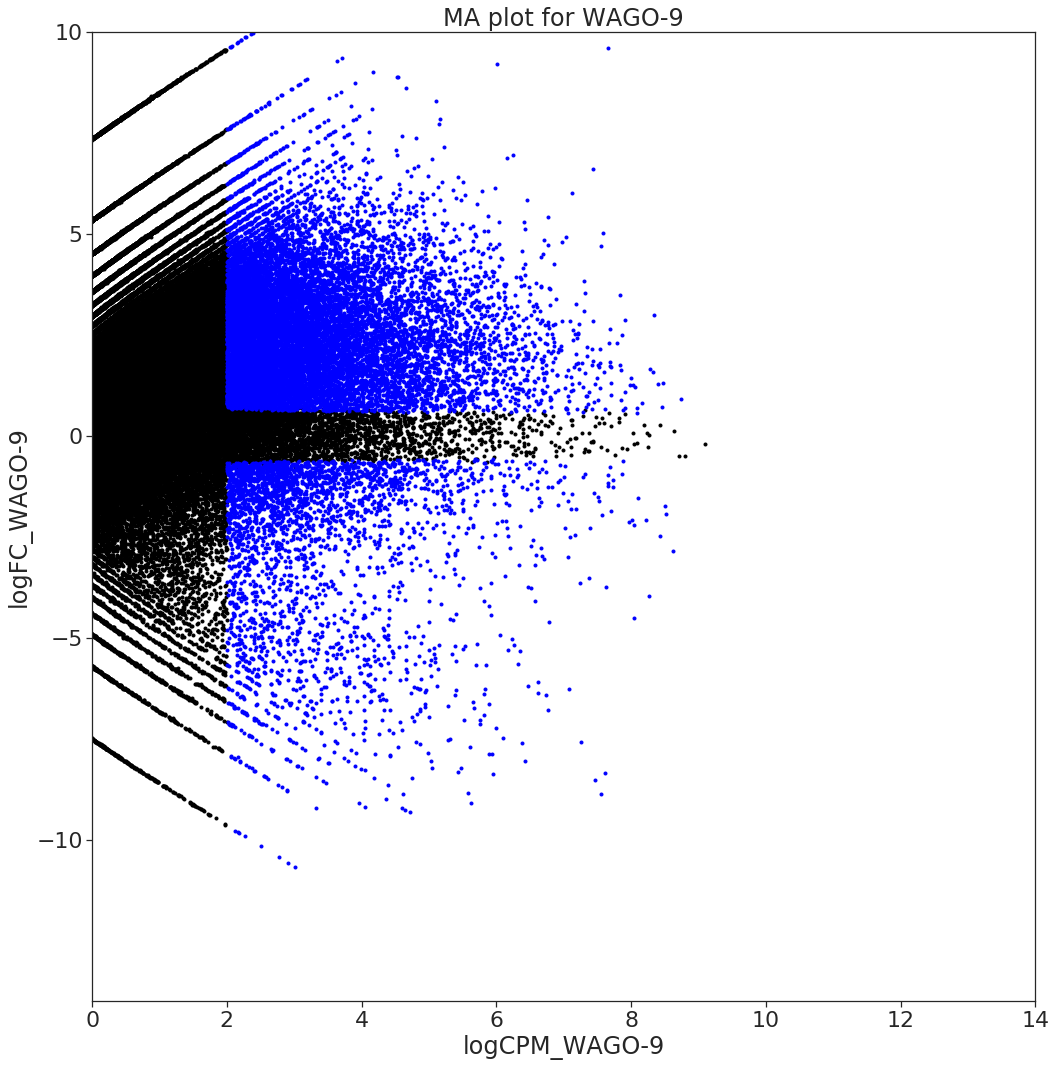

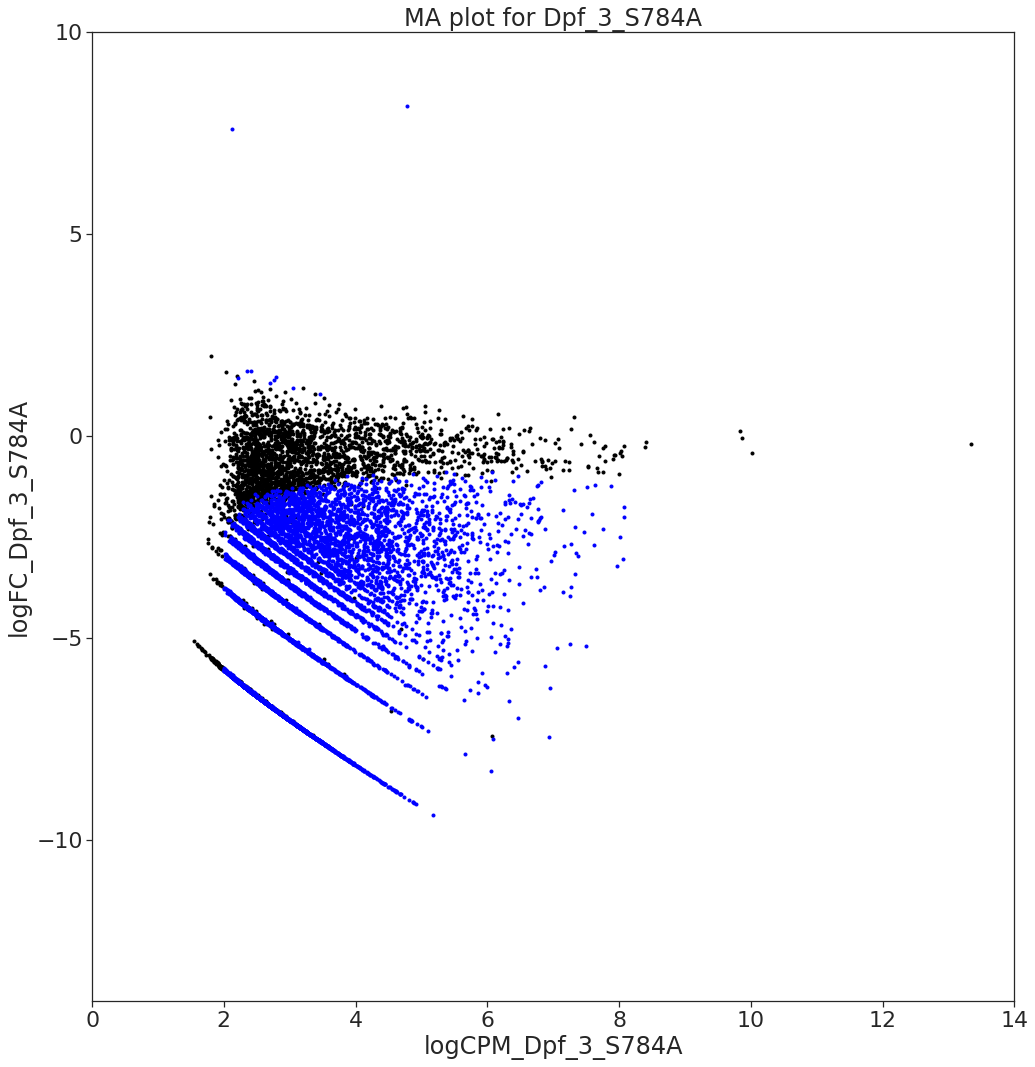

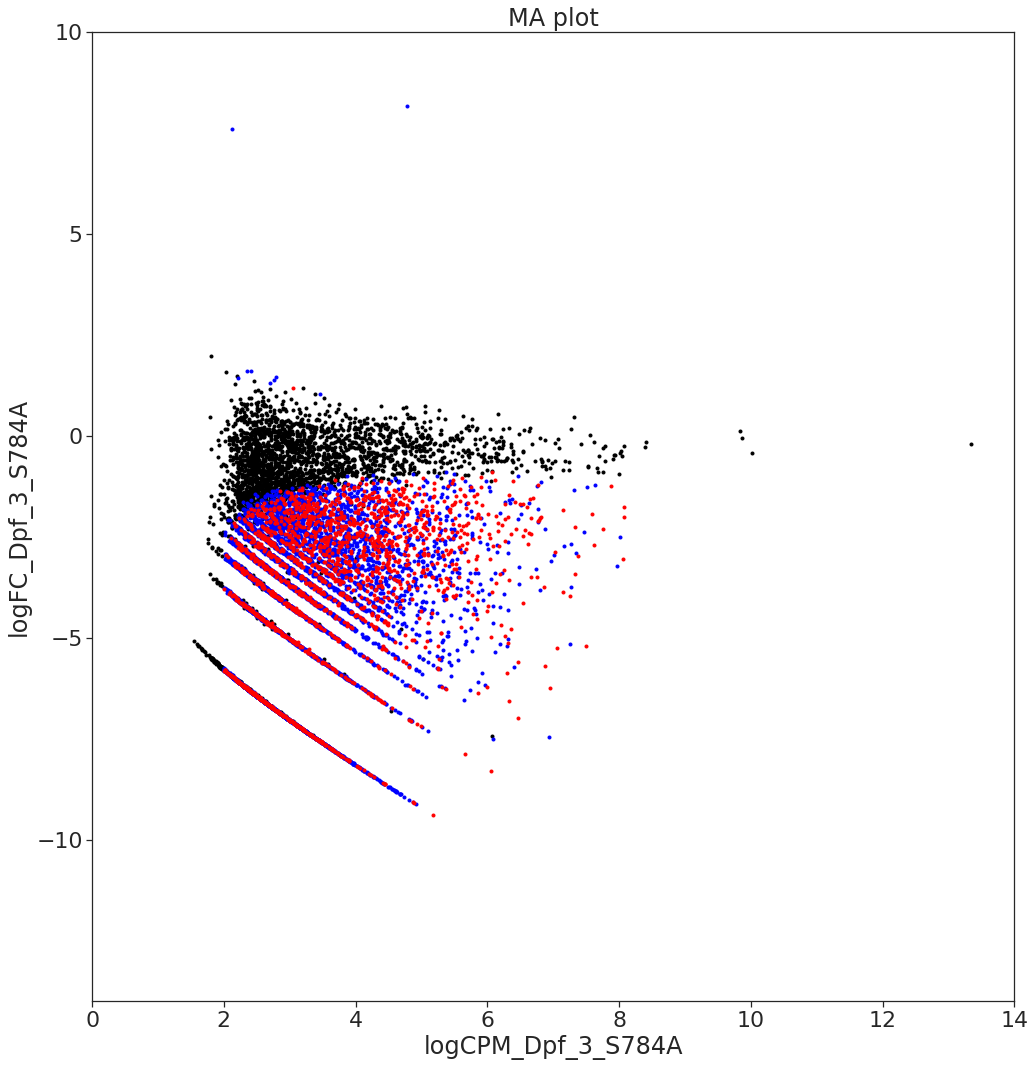

Significant
FDR_Dpf_3_S784A<0.05\nlogCPM_Dpf_3_S784A>2                 6540
No                                                         2498
FDR_Dpf_3_S784A<0.05\nlogCPM_Dpf_3_S784A>2\nFDR...         1983

In [18]:
df_1_path = ip_wago_9_path
df_2_path = Dpf_3_S784A_path
df_1_name = ip_wago_9_name
df_2_name = Dpf_3_S784A_name

df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logCPM_{df_2_name}"]>2),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logCPM_{df_2_name}"]>2) &
           (df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]>0) &
           (df_all[f"logCPM_{df_1_name}"]>2),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogCPM_{df_1_name}>2"

sns_plot = sns.lmplot(x=f"logCPM_{df_2_name}",
                      y=f"logFC_{df_2_name}",
                      data=df_all,
                      fit_reg=False,
                      hue=f"Significant",
                      hue_order=["No", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogCPM_{df_1_name}>2"],
                      palette=["black", "blue", "red"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend)

sns_plot = plt.gca()
sns_plot.set_title(f"MA plot")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)
sns_plot.set(xlim=xlim, ylim=ylim)

plt.savefig(f"plots/MA_{df_2_name}_mark_{df_1_name}.pdf")
plt.show()


pd.DataFrame(df_all["Significant"].value_counts())

## 14. IP WAGO-9 vs mut_2

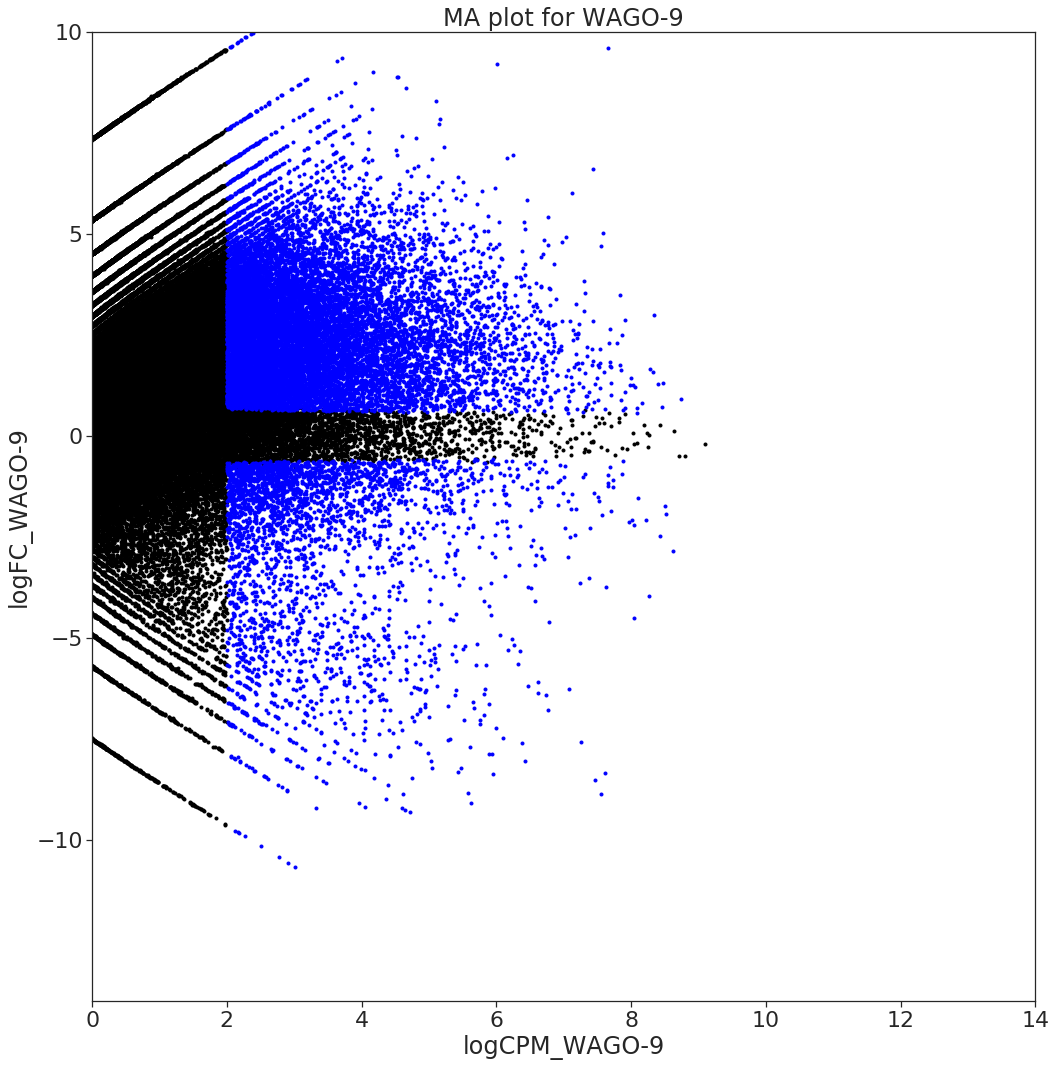

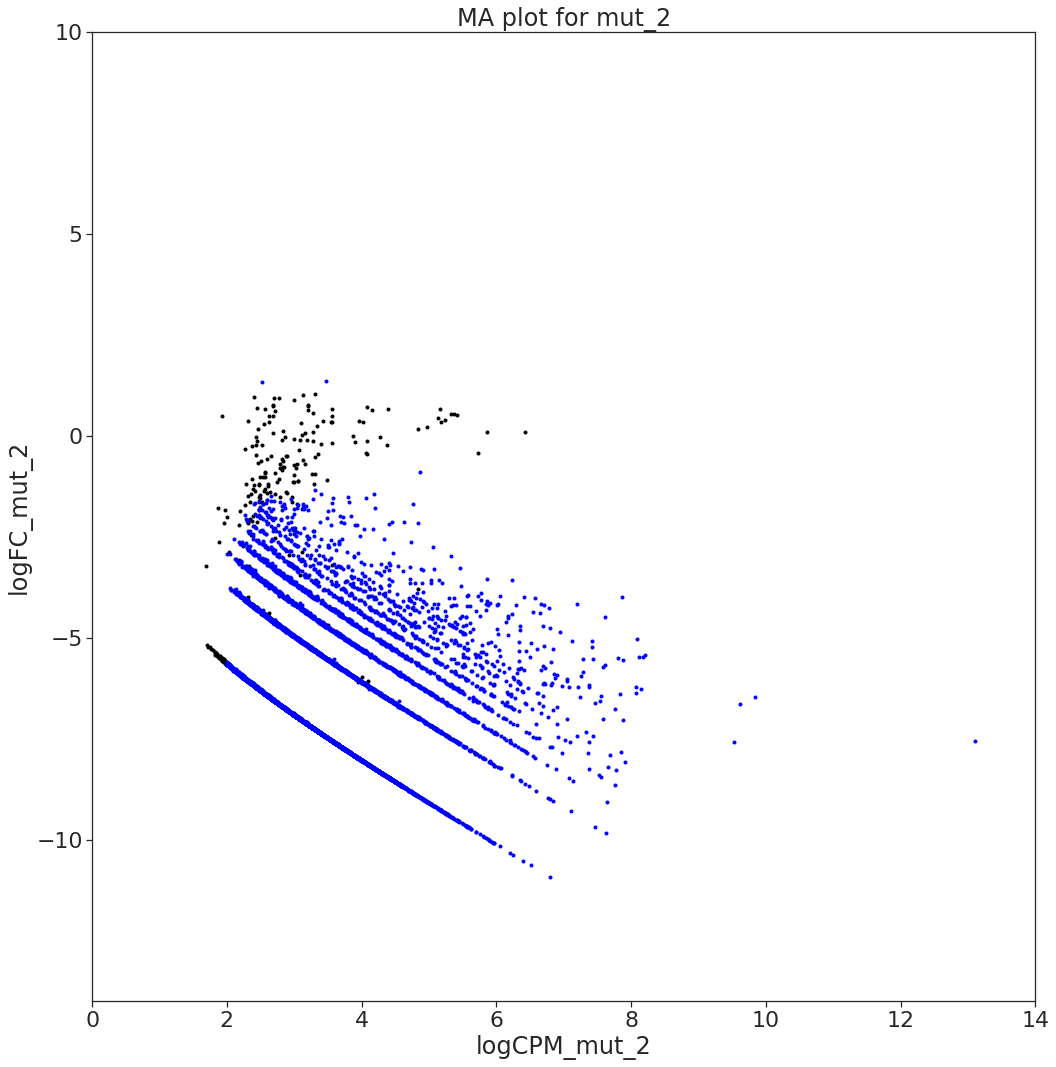

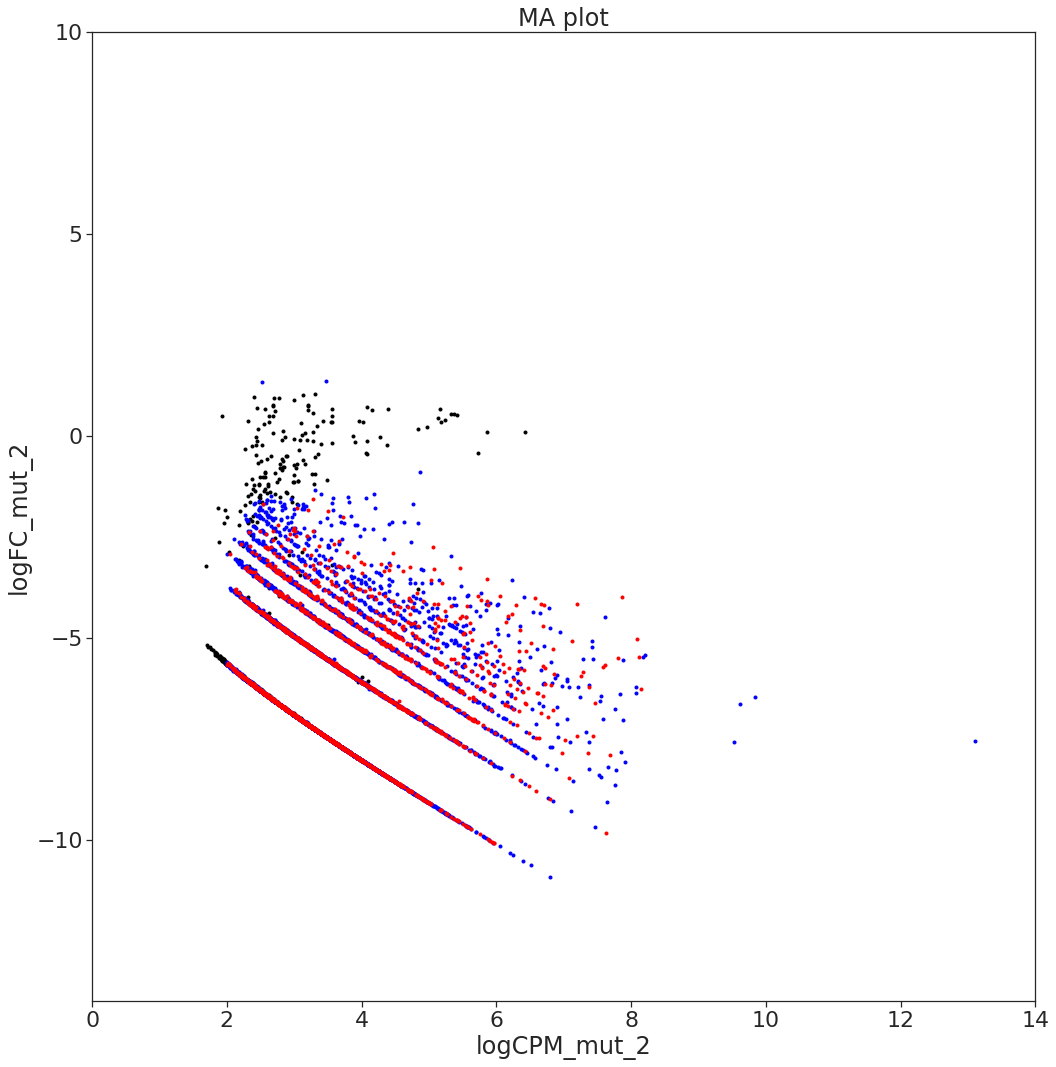

Significant
FDR_mut_2<0.05\nlogCPM_mut_2>2                             8328
FDR_mut_2<0.05\nlogCPM_mut_2>2\nFDR_WAGO-9<0.05...         2253
No                                                          272

In [19]:
df_1_path = ip_wago_9_path
df_2_path = mut_2_path
df_1_name = ip_wago_9_name
df_2_name = mut_2_name

df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logCPM_{df_2_name}"]>2),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logCPM_{df_2_name}"]>2) &
           (df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]>0) &
           (df_all[f"logCPM_{df_1_name}"]>2),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogCPM_{df_1_name}>2"

sns_plot = sns.lmplot(x=f"logCPM_{df_2_name}",
                      y=f"logFC_{df_2_name}",
                      data=df_all,
                      fit_reg=False,
                      hue=f"Significant",
                      hue_order=["No", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogCPM_{df_1_name}>2"],
                      palette=["black", "blue", "red"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend)

sns_plot = plt.gca()
sns_plot.set_title(f"MA plot")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)
sns_plot.set(xlim=xlim, ylim=ylim)


plt.savefig(f"plots/MA_{df_2_name}_mark_{df_1_name}.pdf")
plt.show()


pd.DataFrame(df_all["Significant"].value_counts())

## 15. IP WAGO-9 vs mut_7

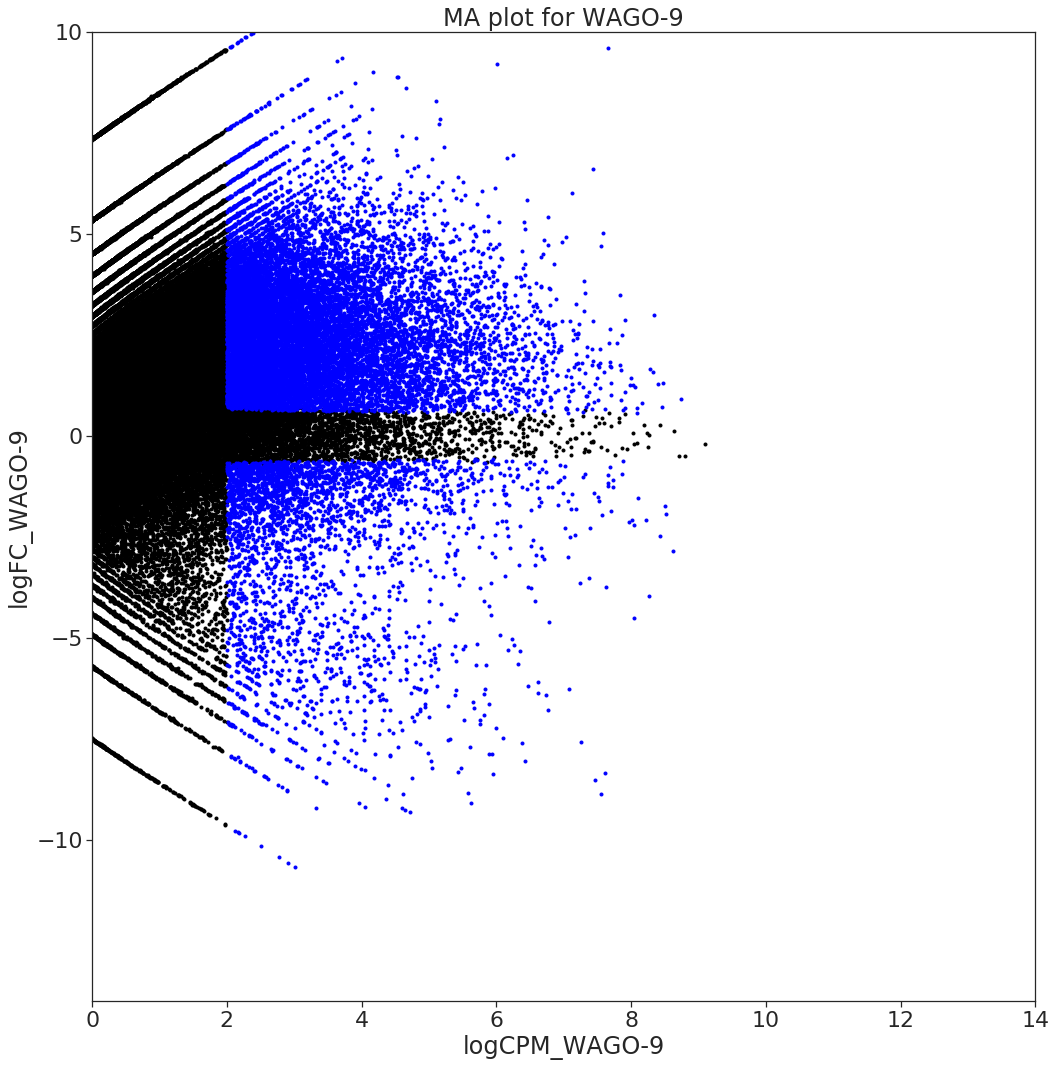

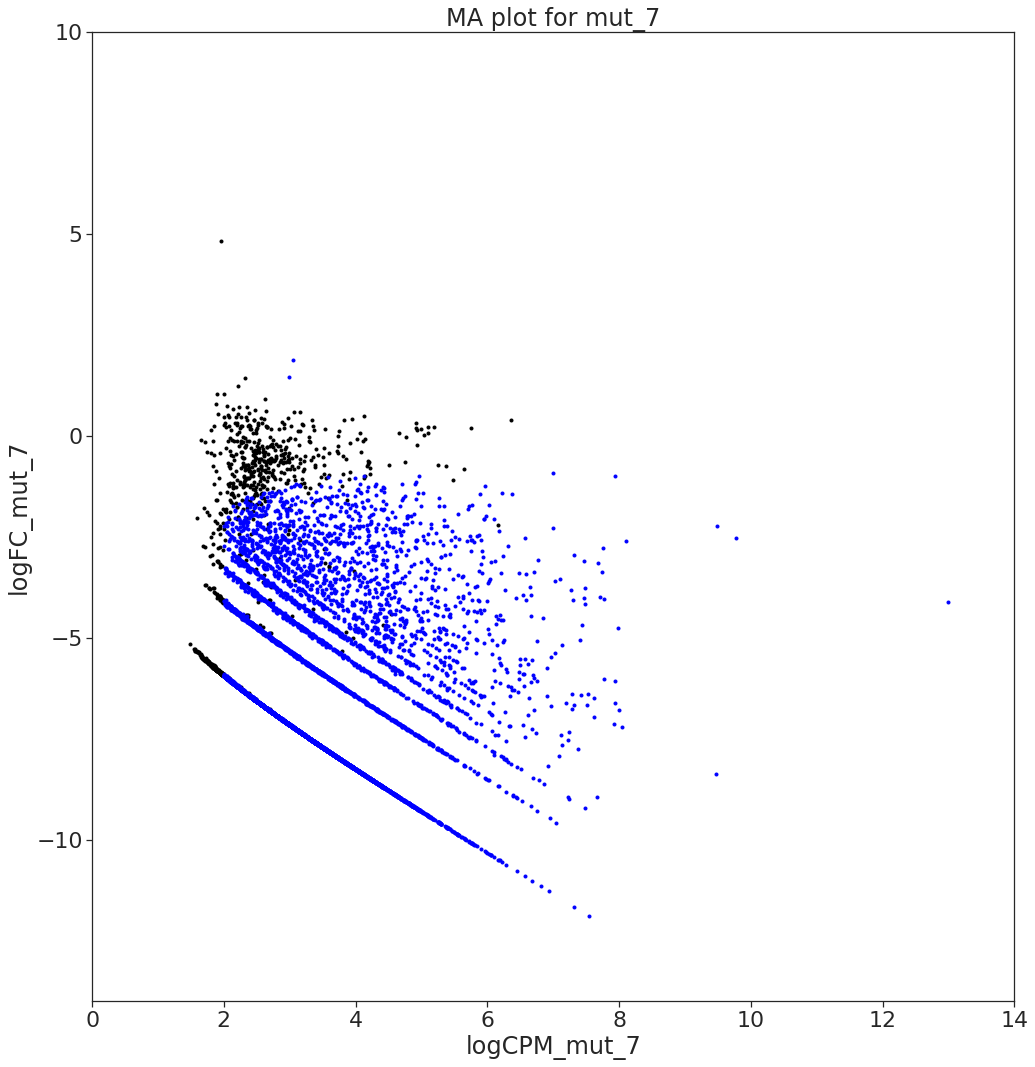

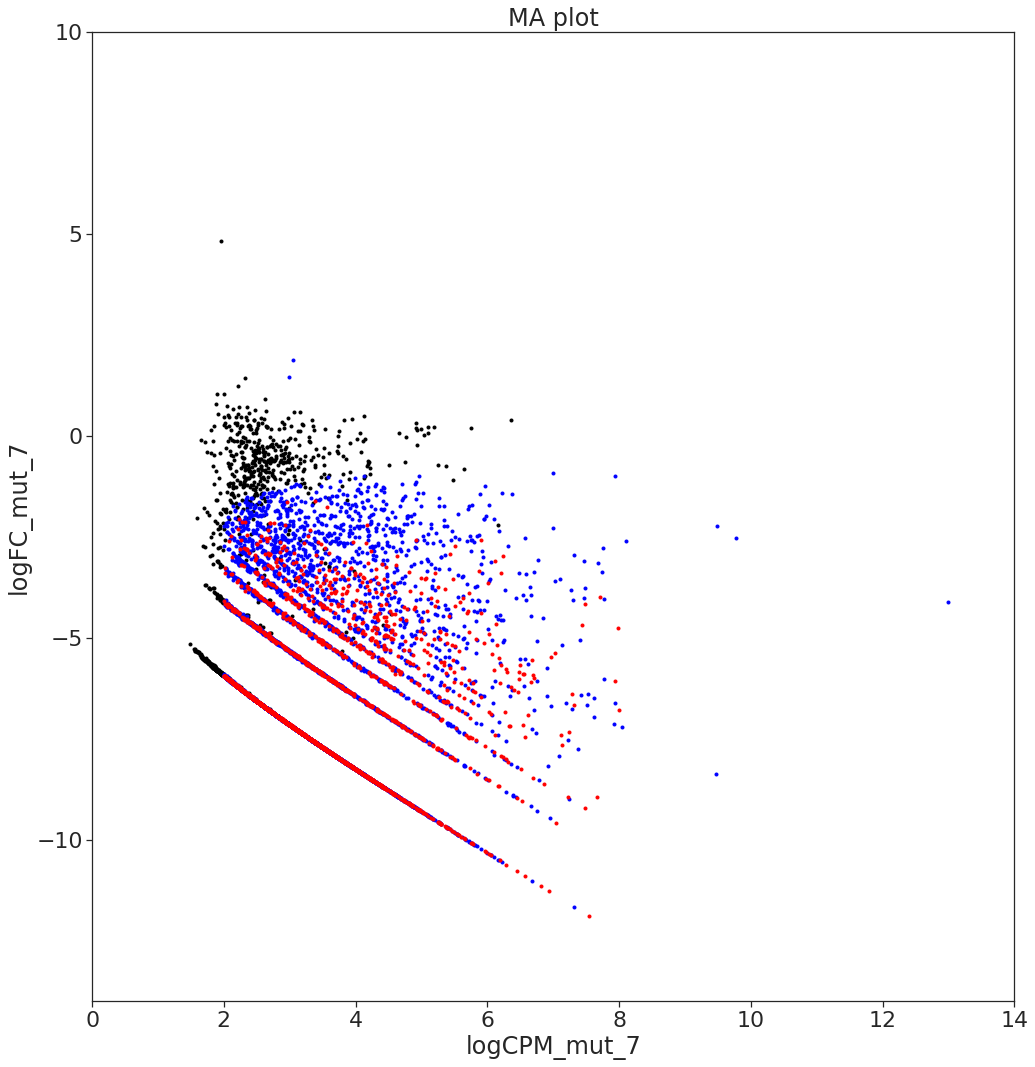

Significant
FDR_mut_7<0.05\nlogCPM_mut_7>2                             8295
FDR_mut_7<0.05\nlogCPM_mut_7>2\nFDR_WAGO-9<0.05...         2285
No                                                          922

In [20]:
df_1_path = ip_wago_9_path
df_2_path = mut_7_path
df_1_name = ip_wago_9_name
df_2_name = mut_7_name

df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logCPM_{df_2_name}"]>2),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logCPM_{df_2_name}"]>2) &
           (df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]>0) &
           (df_all[f"logCPM_{df_1_name}"]>2),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogCPM_{df_1_name}>2"

sns_plot = sns.lmplot(x=f"logCPM_{df_2_name}",
                      y=f"logFC_{df_2_name}",
                      data=df_all,
                      fit_reg=False,
                      hue=f"Significant",
                      hue_order=["No", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogCPM_{df_1_name}>2"],
                      palette=["black", "blue", "red"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend)

sns_plot = plt.gca()
sns_plot.set_title(f"MA plot")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)
sns_plot.set(xlim=xlim, ylim=ylim)


plt.savefig(f"plots/MA_{df_2_name}_mark_{df_1_name}.pdf")
plt.show()


pd.DataFrame(df_all["Significant"].value_counts())

## 16. IP crs-1 vs Dpf_3_null

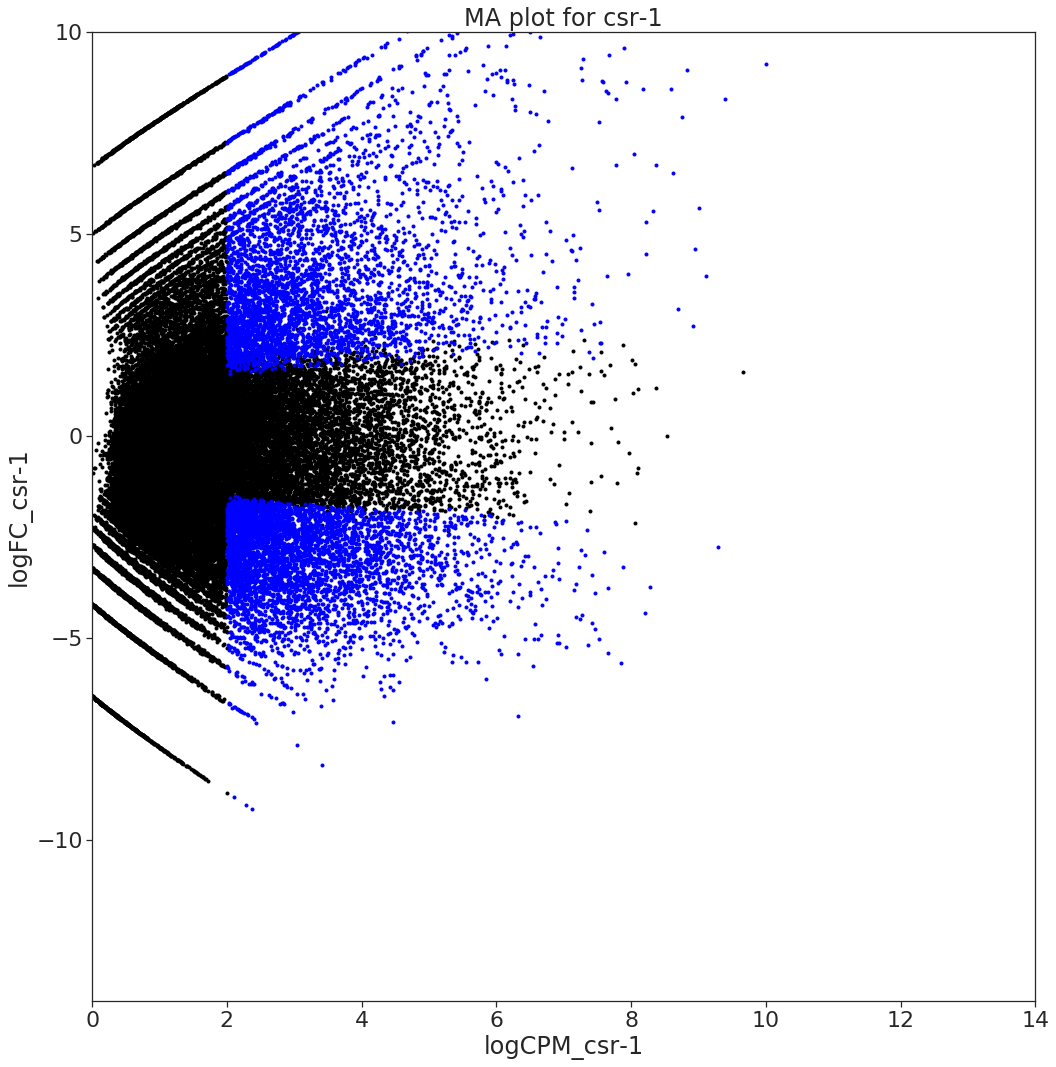

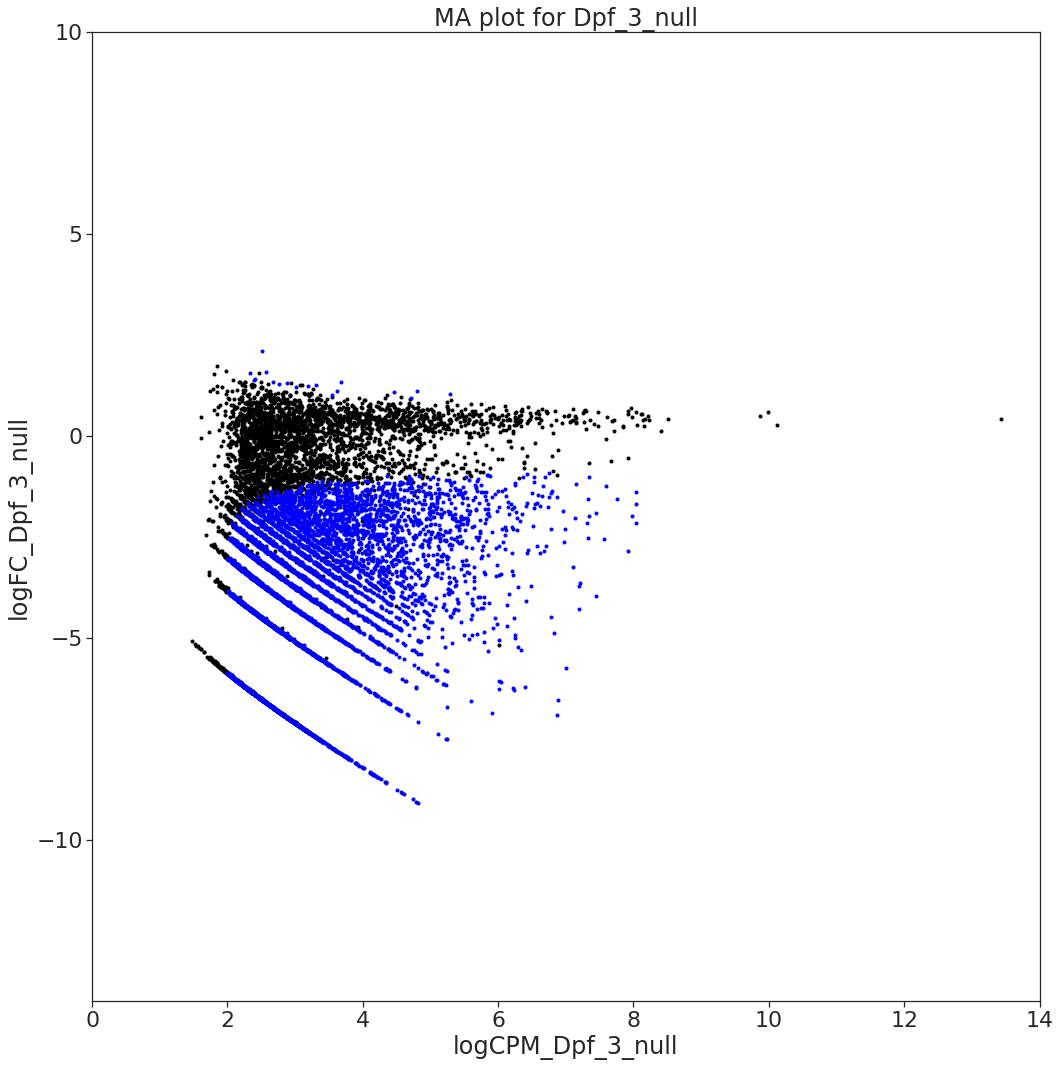

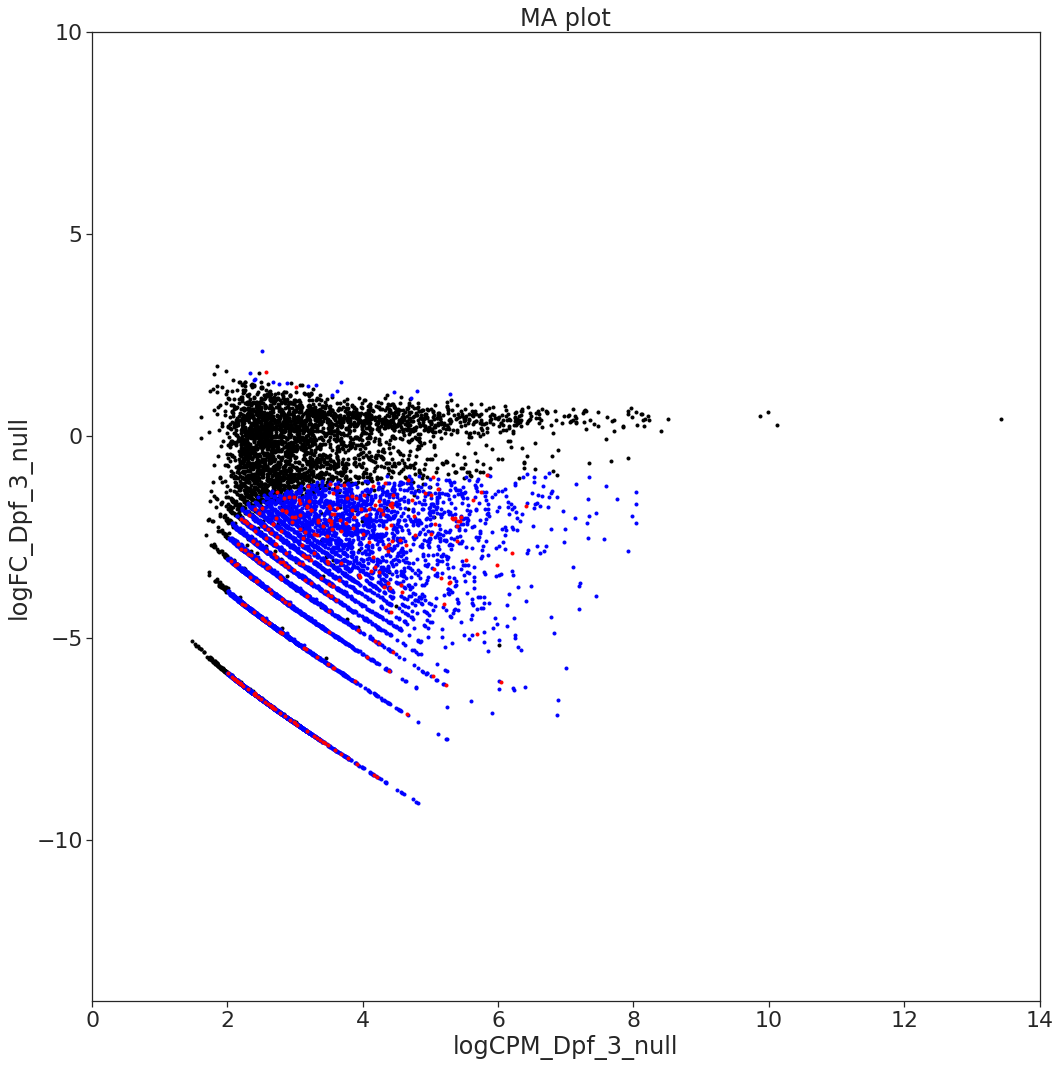

Significant
FDR_Dpf_3_null<0.05\nlogCPM_Dpf_3_null>2                   7427
No                                                         3489
FDR_Dpf_3_null<0.05\nlogCPM_Dpf_3_null>2\nFDR_c...          272

In [21]:
df_1_path = ip_csr_1_path
df_2_path = Dpf_3_null_path
df_1_name = ip_csr_1_name
df_2_name = Dpf_3_null_name

df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logCPM_{df_2_name}"]>2),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logCPM_{df_2_name}"]>2) &
           (df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]>0) &
           (df_all[f"logCPM_{df_1_name}"]>2),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogCPM_{df_1_name}>2"

sns_plot = sns.lmplot(x=f"logCPM_{df_2_name}",
                      y=f"logFC_{df_2_name}",
                      data=df_all,
                      fit_reg=False,
                      hue=f"Significant",
                      hue_order=["No", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogCPM_{df_1_name}>2"],
                      palette=["black", "blue", "red"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend)

sns_plot = plt.gca()
sns_plot.set_title(f"MA plot")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)
sns_plot.set(xlim=xlim, ylim=ylim)


plt.savefig(f"plots/MA_{df_2_name}_mark_{df_1_name}.pdf")
plt.show()


pd.DataFrame(df_all["Significant"].value_counts())

## 17. IP crs-1 vs Dpf_3_S784A

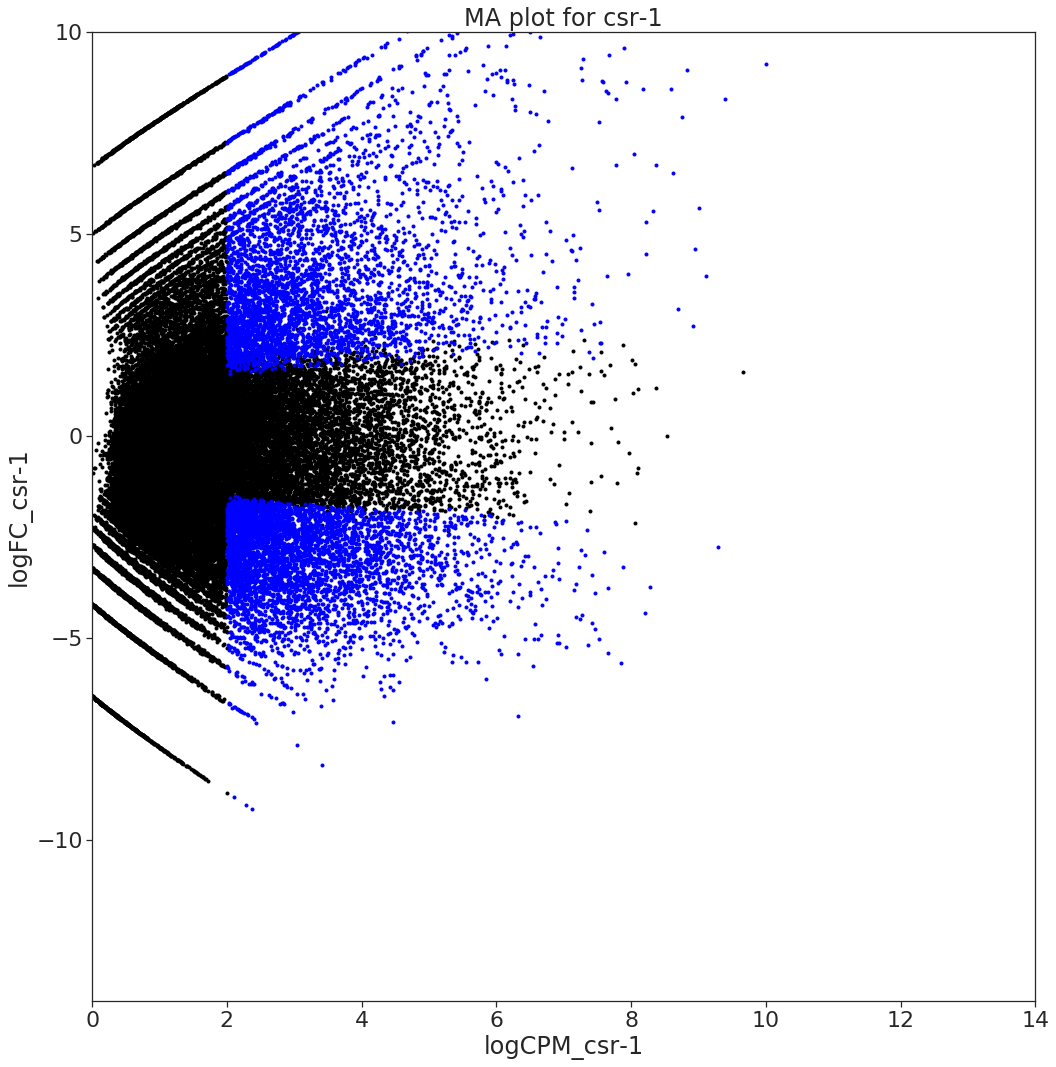

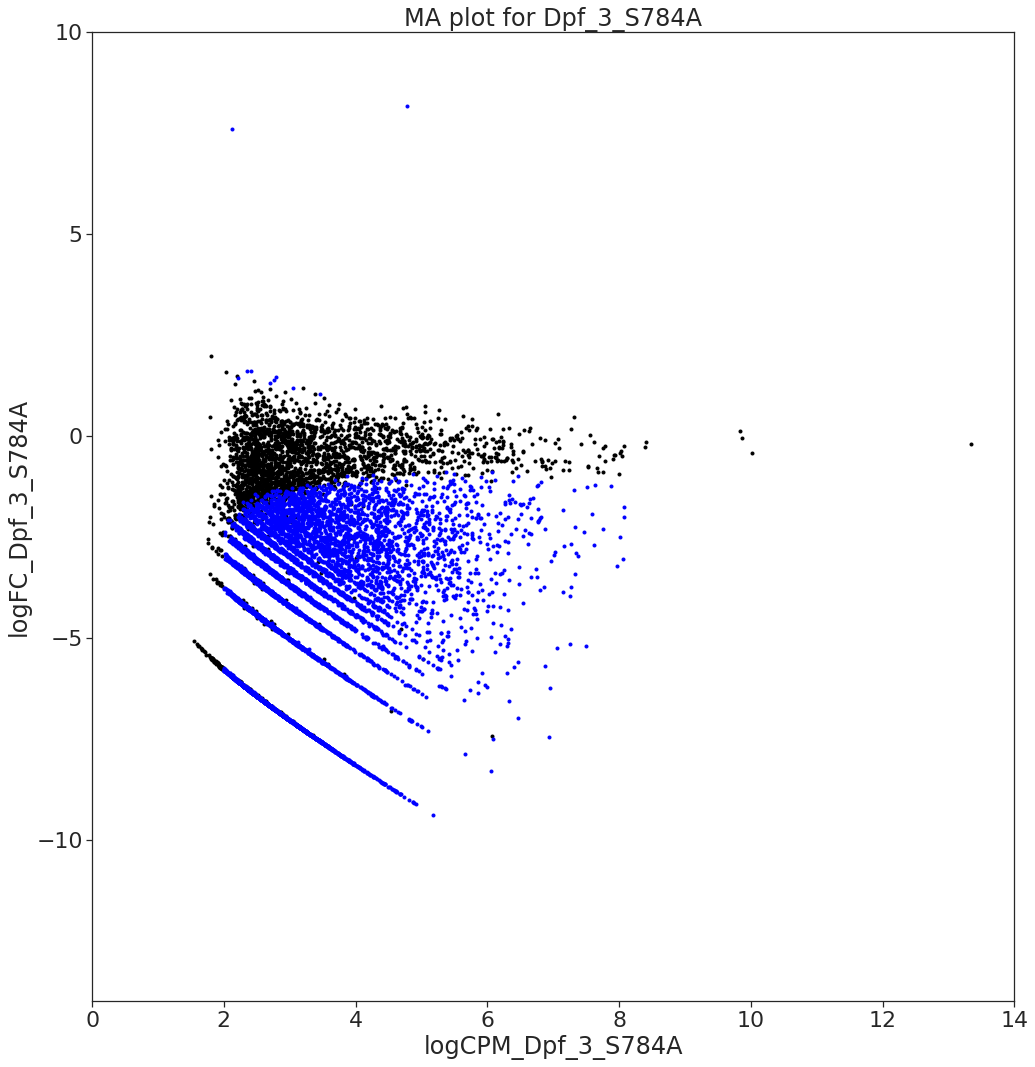

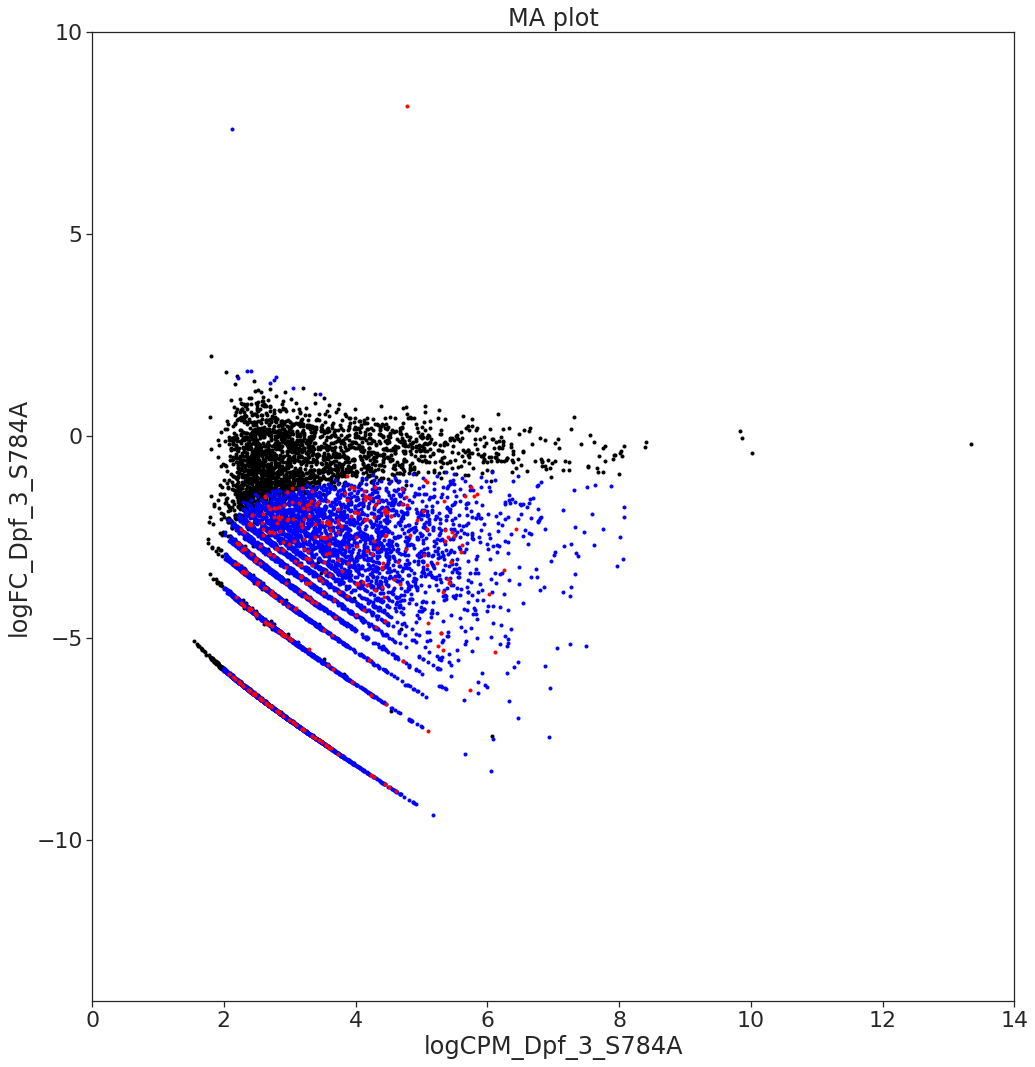

Significant
FDR_Dpf_3_S784A<0.05\nlogCPM_Dpf_3_S784A>2                 8190
No                                                         2498
FDR_Dpf_3_S784A<0.05\nlogCPM_Dpf_3_S784A>2\nFDR...          333

In [22]:
df_1_path = ip_csr_1_path
df_2_path = Dpf_3_S784A_path
df_1_name = ip_csr_1_name
df_2_name = Dpf_3_S784A_name

df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logCPM_{df_2_name}"]>2),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logCPM_{df_2_name}"]>2) &
           (df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]>0) &
           (df_all[f"logCPM_{df_1_name}"]>2),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogCPM_{df_1_name}>2"

sns_plot = sns.lmplot(x=f"logCPM_{df_2_name}",
                      y=f"logFC_{df_2_name}",
                      data=df_all,
                      fit_reg=False,
                      hue=f"Significant",
                      hue_order=["No", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogCPM_{df_1_name}>2"],
                      palette=["black", "blue", "red"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend)

sns_plot = plt.gca()
sns_plot.set_title(f"MA plot")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)
sns_plot.set(xlim=xlim, ylim=ylim)


plt.savefig(f"plots/MA_{df_2_name}_mark_{df_1_name}.pdf")
plt.show()


pd.DataFrame(df_all["Significant"].value_counts())

## 18. IP crs-1 vs mut_2

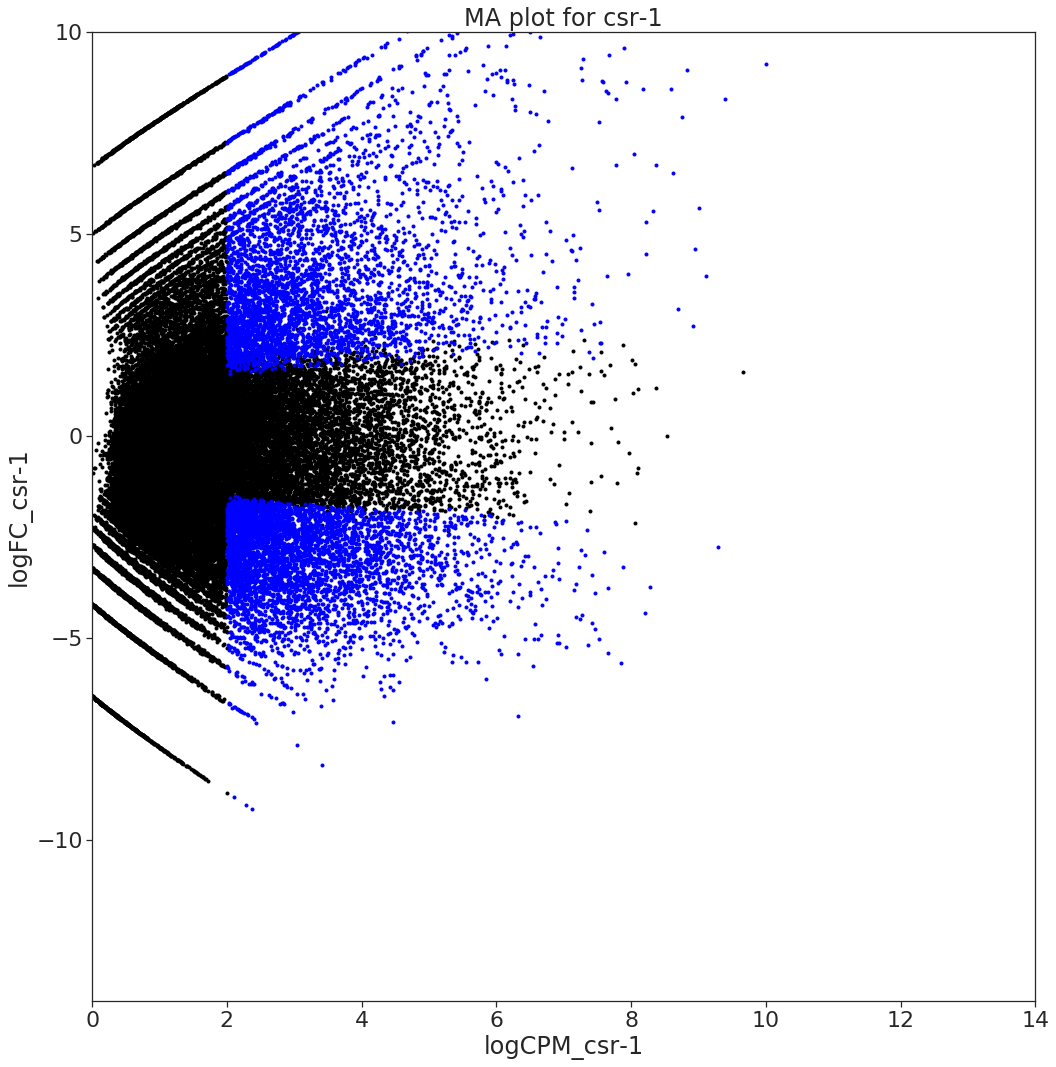

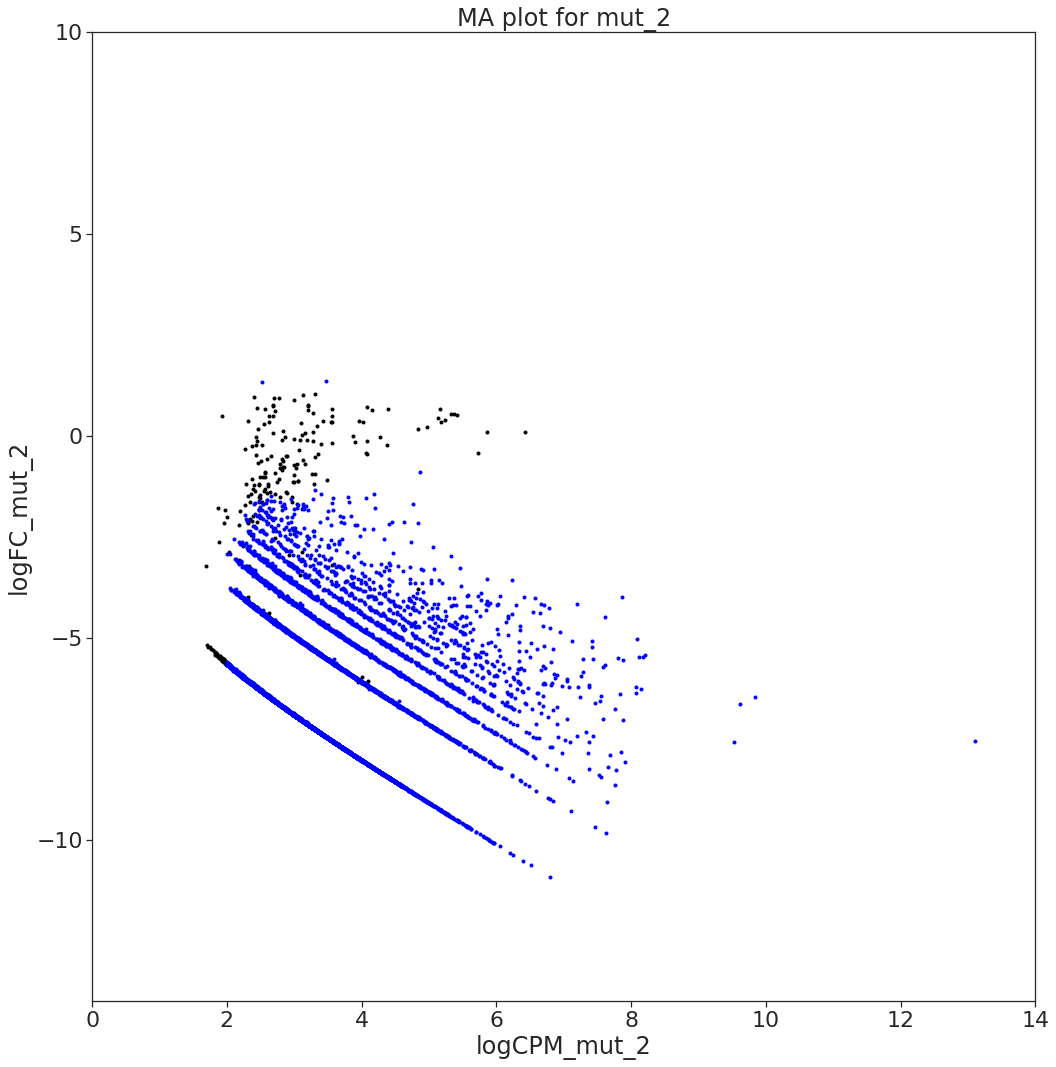

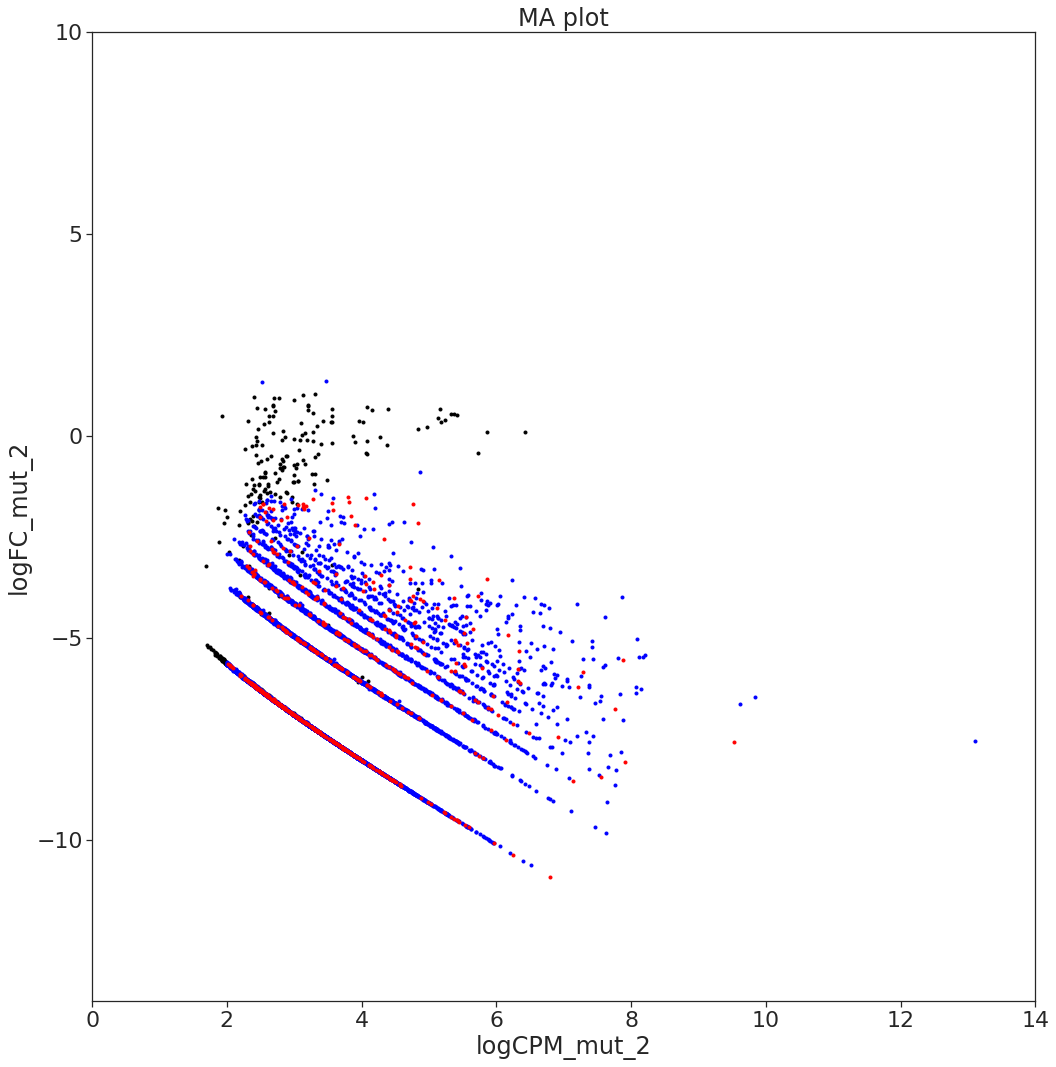

Significant
FDR_mut_2<0.05\nlogCPM_mut_2>2                            10016
FDR_mut_2<0.05\nlogCPM_mut_2>2\nFDR_csr-1<0.05\...          565
No                                                          272

In [23]:
df_1_path = ip_csr_1_path
df_2_path = mut_2_path
df_1_name = ip_csr_1_name
df_2_name = mut_2_name

df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logCPM_{df_2_name}"]>2),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logCPM_{df_2_name}"]>2) &
           (df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]>0) &
           (df_all[f"logCPM_{df_1_name}"]>2),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogCPM_{df_1_name}>2"

sns_plot = sns.lmplot(x=f"logCPM_{df_2_name}",
                      y=f"logFC_{df_2_name}",
                      data=df_all,
                      fit_reg=False,
                      hue=f"Significant",
                      hue_order=["No", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogCPM_{df_1_name}>2"],
                      palette=["black", "blue", "red"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend)

sns_plot = plt.gca()
sns_plot.set_title(f"MA plot")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)
sns_plot.set(xlim=xlim, ylim=ylim)



plt.savefig(f"plots/MA_{df_2_name}_mark_{df_1_name}.pdf")
plt.show()


pd.DataFrame(df_all["Significant"].value_counts())

## 19. IP crs-1 vs mut_7

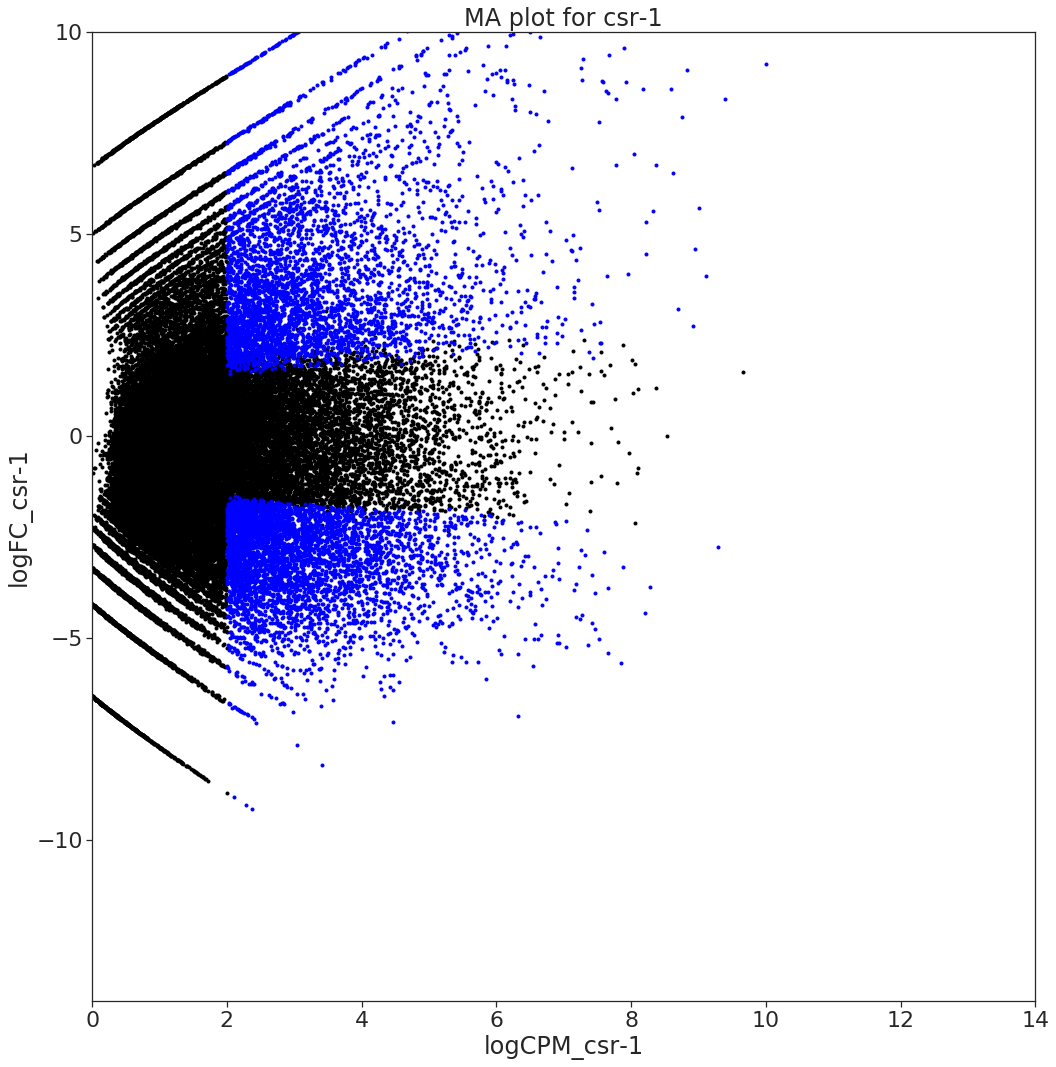

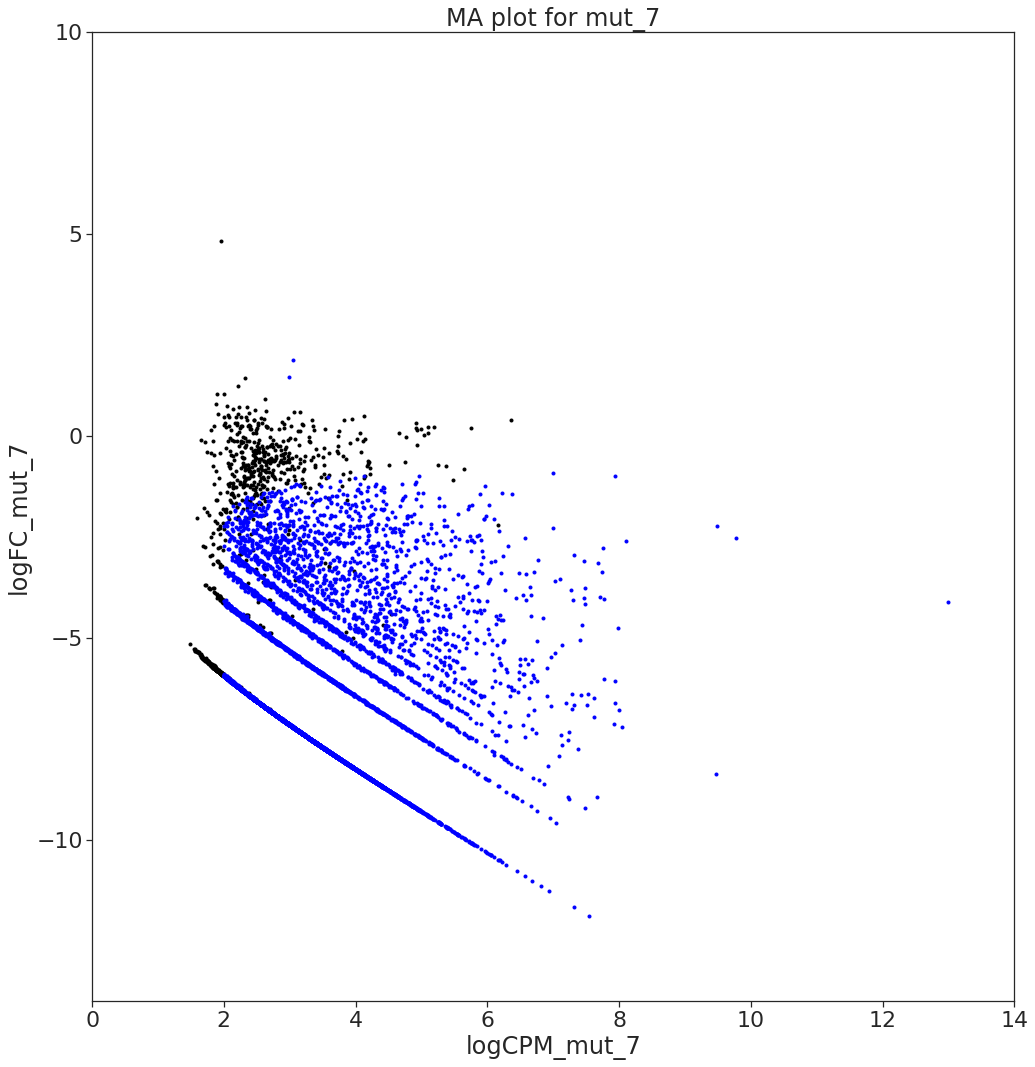

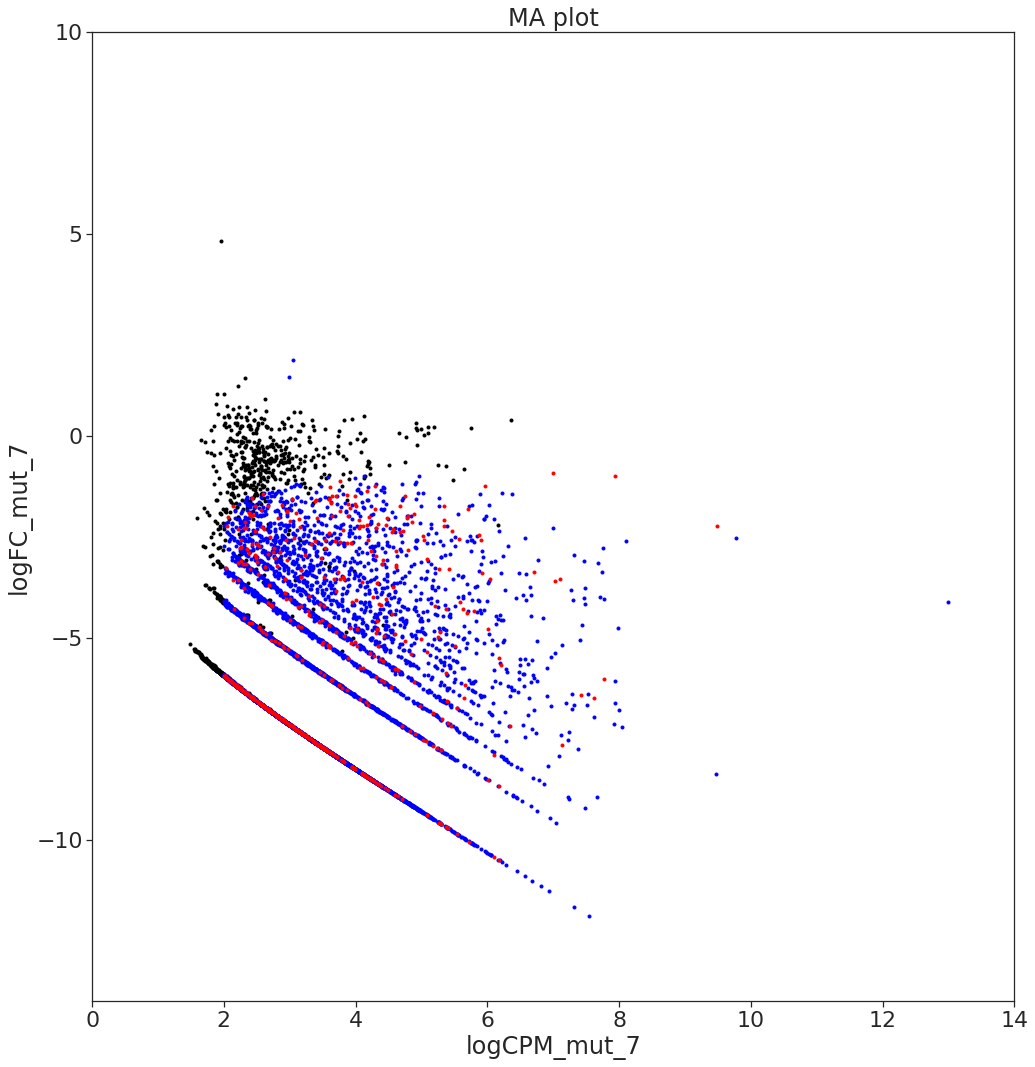

Significant
FDR_mut_7<0.05\nlogCPM_mut_7>2                            10041
No                                                          922
FDR_mut_7<0.05\nlogCPM_mut_7>2\nFDR_csr-1<0.05\...          539

In [24]:
df_1_path = ip_csr_1_path
df_2_path = mut_7_path
df_1_name = ip_csr_1_name
df_2_name = mut_7_name

df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logCPM_{df_2_name}"]>2),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logCPM_{df_2_name}"]>2) &
           (df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]>0) &
           (df_all[f"logCPM_{df_1_name}"]>2),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogCPM_{df_1_name}>2"

sns_plot = sns.lmplot(x=f"logCPM_{df_2_name}",
                      y=f"logFC_{df_2_name}",
                      data=df_all,
                      fit_reg=False,
                      hue=f"Significant",
                      hue_order=["No", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogCPM_{df_1_name}>2"],
                      palette=["black", "blue", "red"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend)

sns_plot = plt.gca()
sns_plot.set_title(f"MA plot")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)
sns_plot.set(xlim=xlim, ylim=ylim)

plt.savefig(f"plots/MA_{df_2_name}_mark_{df_1_name}.pdf")
plt.show()


pd.DataFrame(df_all["Significant"].value_counts())